## Importing Libraries

In [1]:
from f_basics import *
from data_prep import *
from mc_sim import *
from lstm_sim import *
from doc import *
#Libraries include plot and some basic functions.

##  Data Preprocessing

In [ ]:
stocks = pd.read_excel('temelozet.xlsx',index_col='Stock')
# temelozet.xlsx file is taken from www.isyatirim.com.tr
stocks_info = stocks.to_dict('index')
# stocks_info contains fundamental informations about stocks currently active on market.


In [155]:
market = pr.DataReader('XU100.IS')

[*********************100%%**********************]  1 of 1 completed


In [4]:
for stock in stocks_info:
    stocks_info[stock].update({'Stock Data':pr.DataReader(stock+'.IS')})
    stocks_info[stock].update({"Symbol":stock})

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [5]:
# Saving data for extraordinary cases
with open('stocks_data.pkl', 'wb') as stocks_all:
    pickle.dump(stocks_info, stocks_all)

In [6]:
with open('stocks_data.pkl', 'rb') as stocks_all:
    stocks_info = pickle.load(stocks_all)

## Data Filtering 

In [7]:
begin_date, end_date = '2021-09-01 00:00:00', '2023-09-01 00:00:00'
begin = time_it(begin_date)
end = time_it(end_date)


In [8]:
# Calculating VAR, CAPM and Beta values for stock data in given time interval.
for stock in stocks_info:
    del stocks_info[stock]['Close (TL)']
    if len(stocks_info[stock]['Stock Data'].index) < 504:
        stocks_info[stock].update({'Newbie':True})
        continue

    else:
        stocks_info[stock].update({'Newbie':False})
    stock_data = stocks_info[stock]['Stock Data'].loc[(stocks_info[stock]['Stock Data'].index > begin) 
                                       & (stocks_info[stock]['Stock Data'].index < end)]
    stocks_info[stock].update({'Beta':Beta(stock_data, market)[0]})
    stocks_info[stock].update({'CAPM':CAPM(stock_data, market)})
    stocks_info[stock].update({'VAR':VAR(stock_data)})

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


In [9]:
stock_df = pd.concat([pd.DataFrame(stocks_info.keys()),
                      pd.DataFrame(stocks_info.values())],
                      axis=1)
stock_df.drop(columns=['Stock Data'], inplace=True)
stock_df.rename(columns={0:'Stock Name'}, inplace=True)

In [10]:
# Filtering stocks for desired values/parameters.
filtered_stocks = np.where((stock_df['Beta'] >= 0.4)
                           & (stock_df['Beta'] < 1.0) 
                           & (stock_df['CAPM'] > 30) 
                           & (stock_df['VAR'] < 0.05)
                           & (stock_df['Newbie'] == False))
chosen_stocks = stock_df.loc[filtered_stocks]
chosen_stocks.set_index('Stock Name',inplace=True)
chosen_stocks


,Name,Sector,Market Cap (mn TL),Market Cap (mn $),Float Rate (%),Paid In Capital (mn TL),Symbol,Newbie,Beta,CAPM,VAR
Stock Name,,,,,,,,,,,
AEFES,Anadolu Efes,Meşrubat / İçecek,63947.4,2372.7,32.9,592.1,AEFES,False,0.424437,38.324311,0.049925
ALKIM,Alkim,Kimyasal Ürün,6105.0,226.5,46.5,150.0,ALKIM,False,0.444123,40.101793,0.048930
BIMAS,Bim Birleşik Mağazalar A.Ş,Perakande - Ticaret,163944.0,6083.1,67.9,607.2,BIMAS,False,0.538750,48.646069,0.045940
BRISA,Brisa,Otomotiv Lastiği,27933.4,1036.5,10.2,305.1,BRISA,False,0.468236,42.279060,0.049805
CCOLA,Coca-Cola İçecek A.Ş,Meşrubat / İçecek,100603.6,3732.8,28.9,254.4,CCOLA,False,0.467700,42.230659,0.046164
HDFGS,Hedef Girişim Sermayesi,Yatırım Ortaklıkları,1158.3,43.0,78.1,565.0,HDFGS,False,0.411395,37.146677,0.047467
ISYAT,İs YO,Yatırım Ortaklıkları,1132.2,42.0,67.3,160.6,ISYAT,False,0.457803,41.337060,0.045124
KARTN,Kartonsan,Kağıt Ürünleri,5996.3,222.5,21.8,75.0,KARTN,False,0.436242,39.390193,0.048281
LOGO,Logo Yazılım,Teknoloji,7680.0,285.0,66.3,100.0,LOGO,False,0.424997,38.374887,0.046008


## Data Visualization

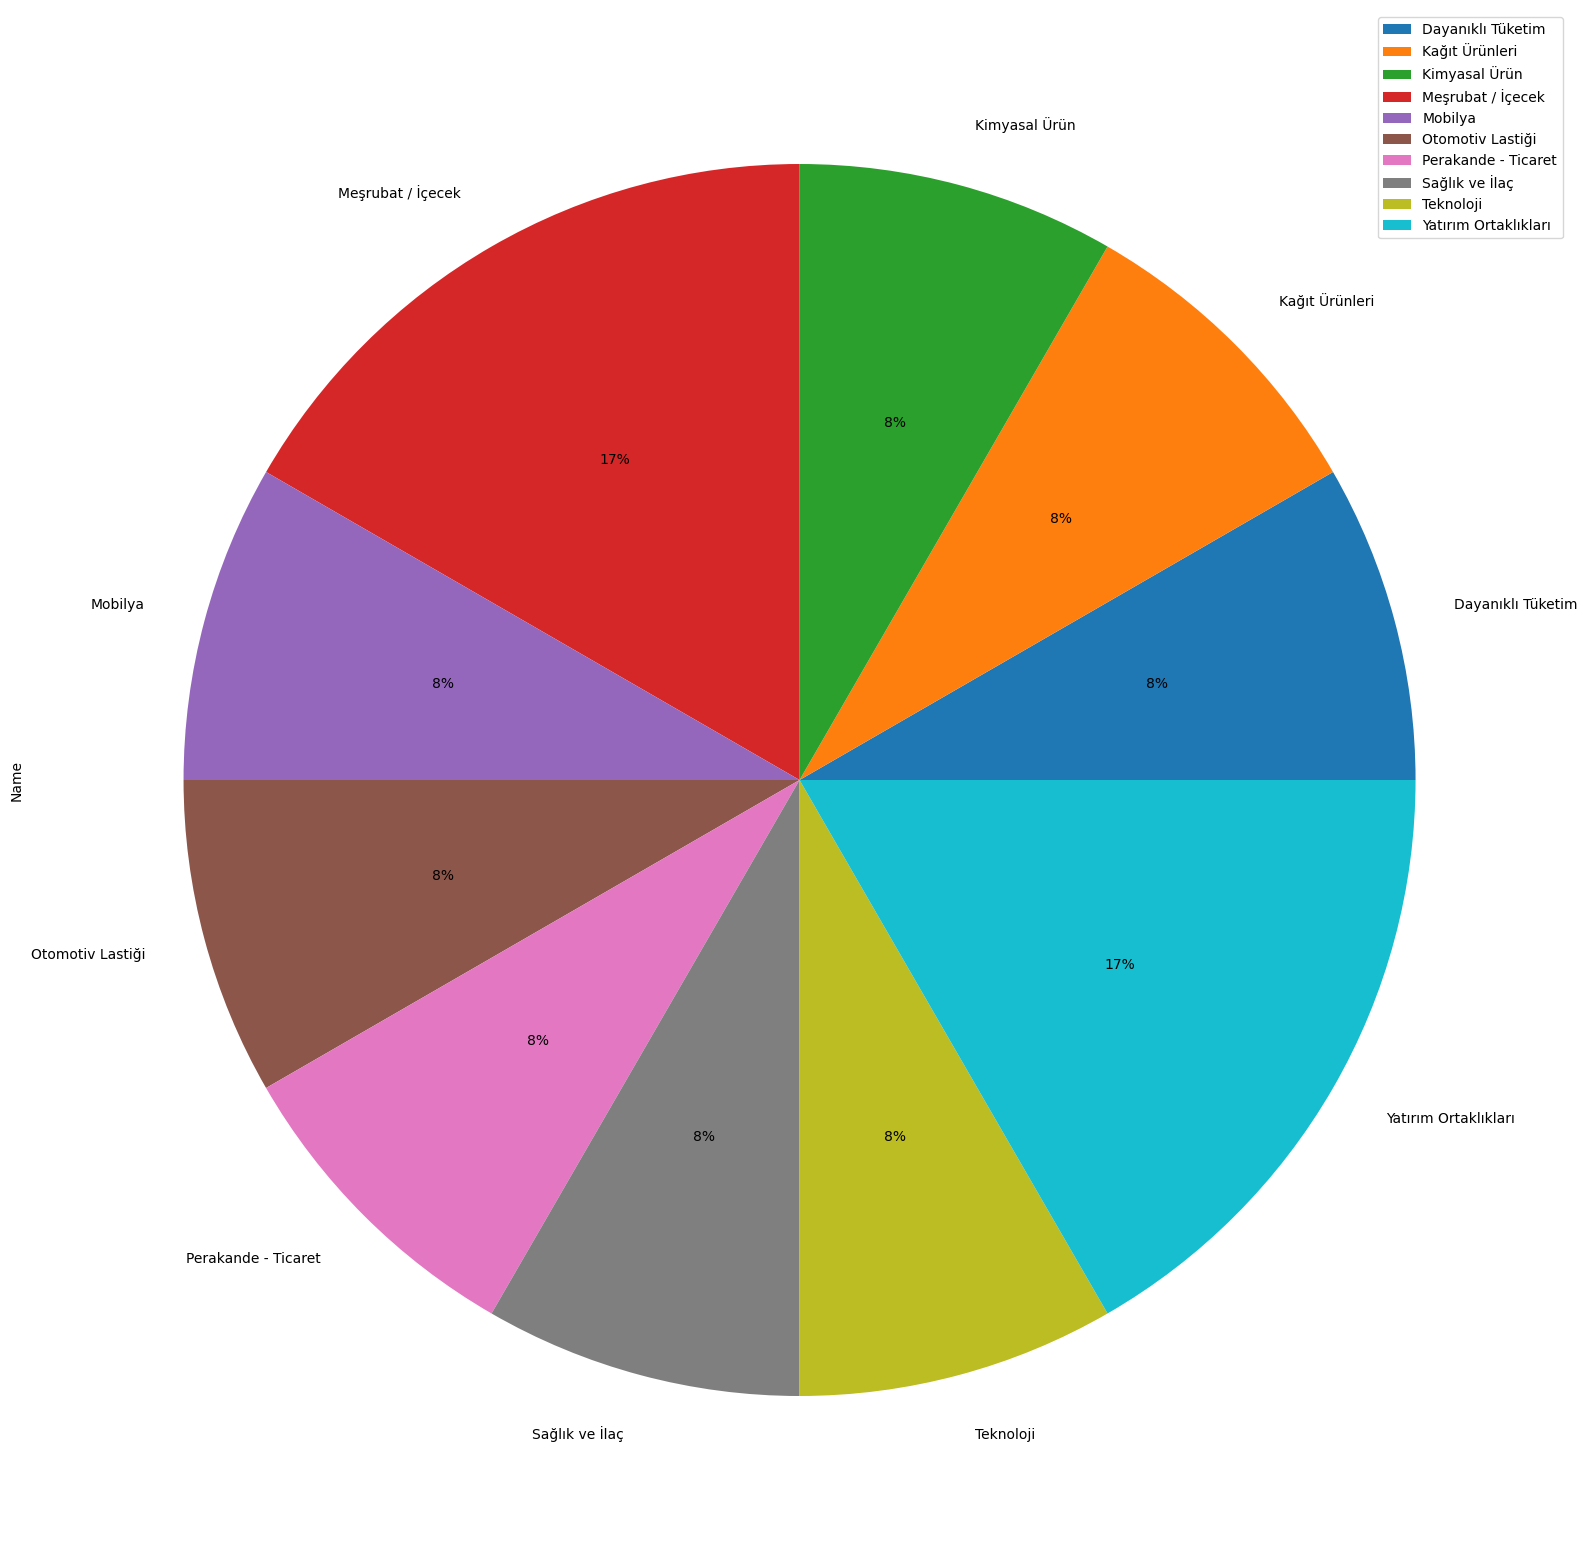

In [11]:
chosen_stocks.groupby(['Sector']).count().plot(kind='pie', y='Name',autopct='%1.0f%%',figsize=(20,20));

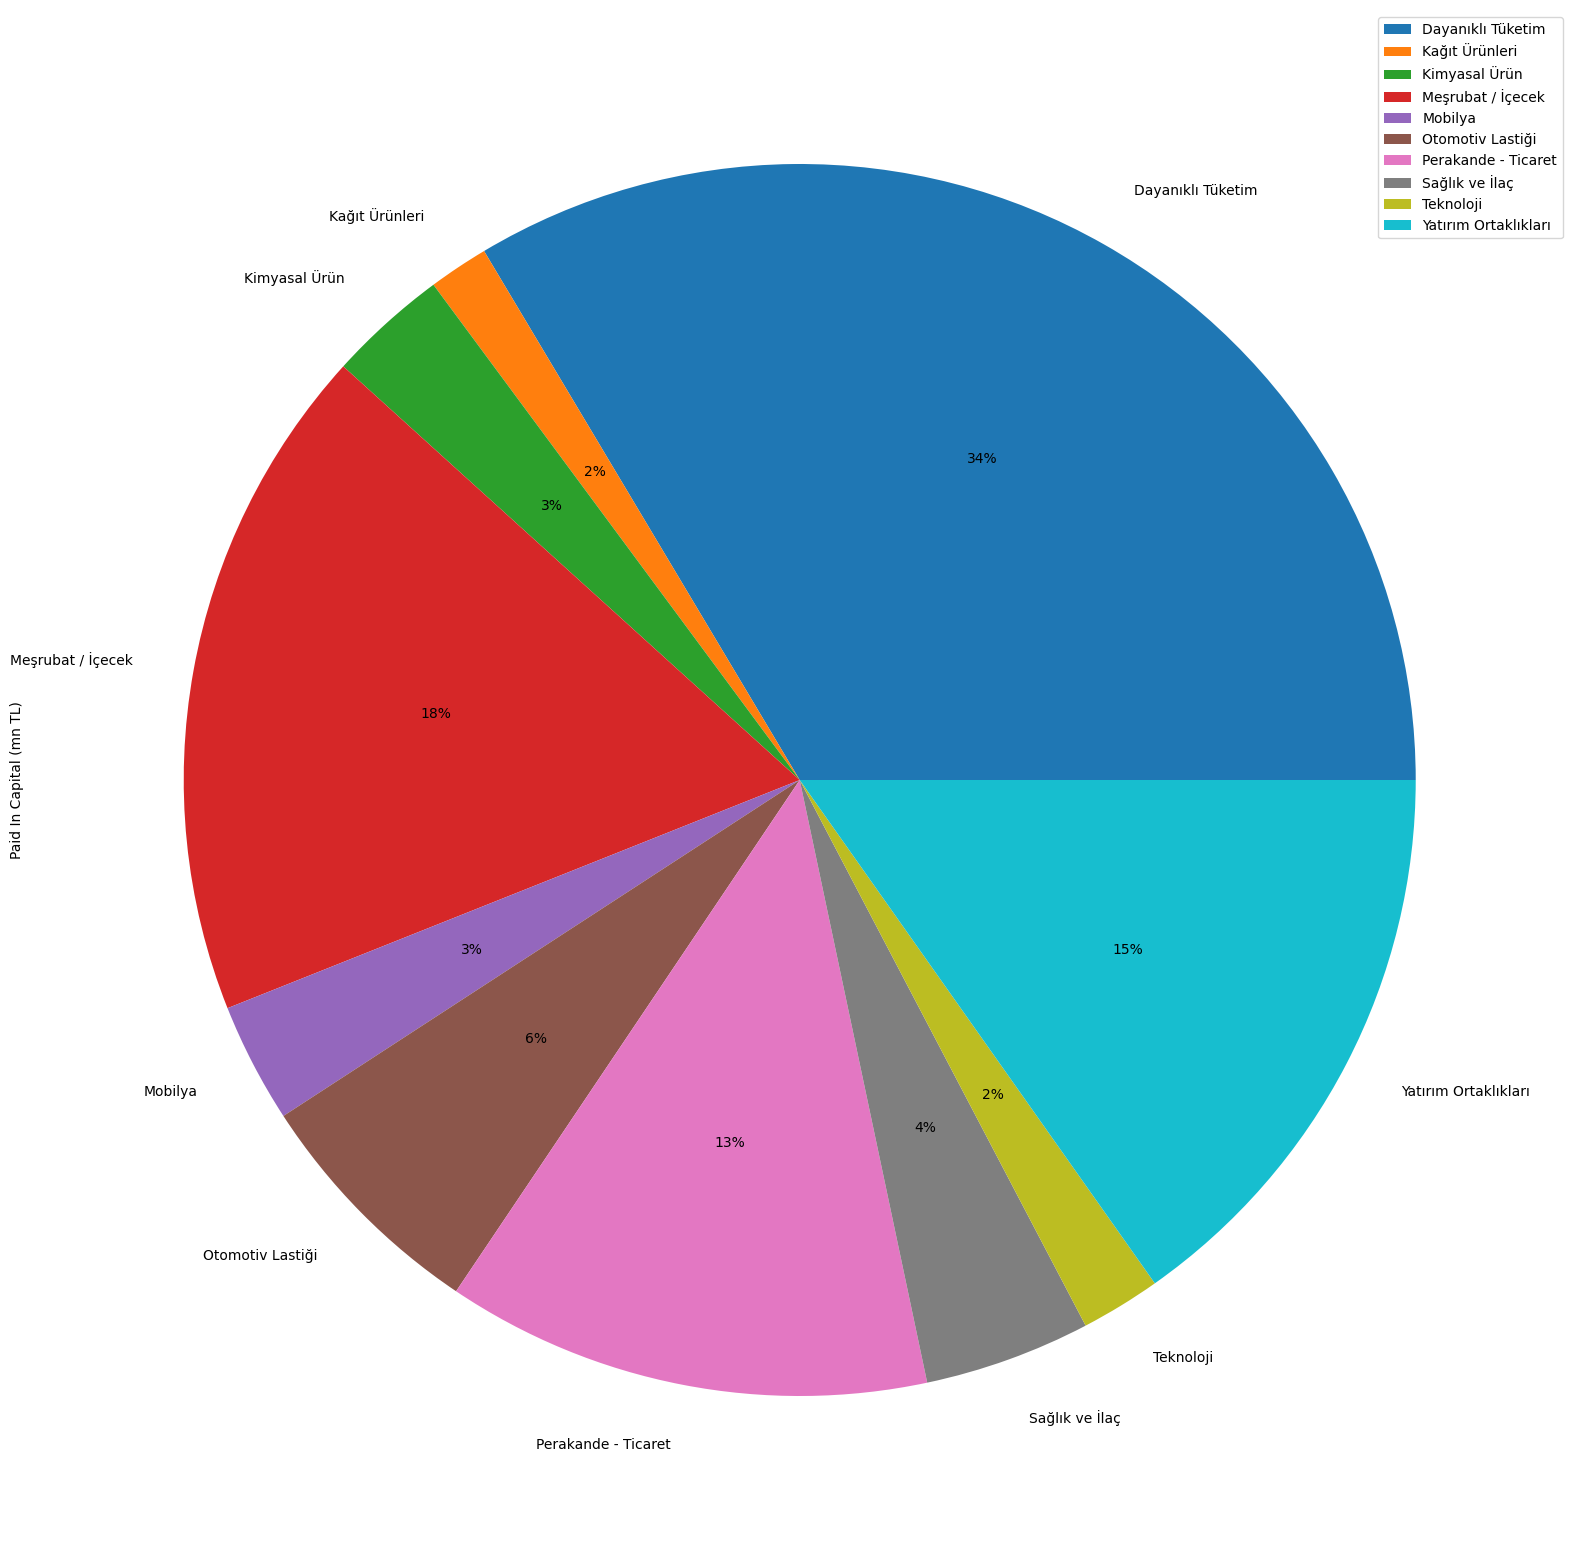

In [12]:
chosen_stocks.groupby('Sector').sum().plot(kind='pie', y='Paid In Capital (mn TL)',autopct='%1.0f%%',figsize=(20,20));

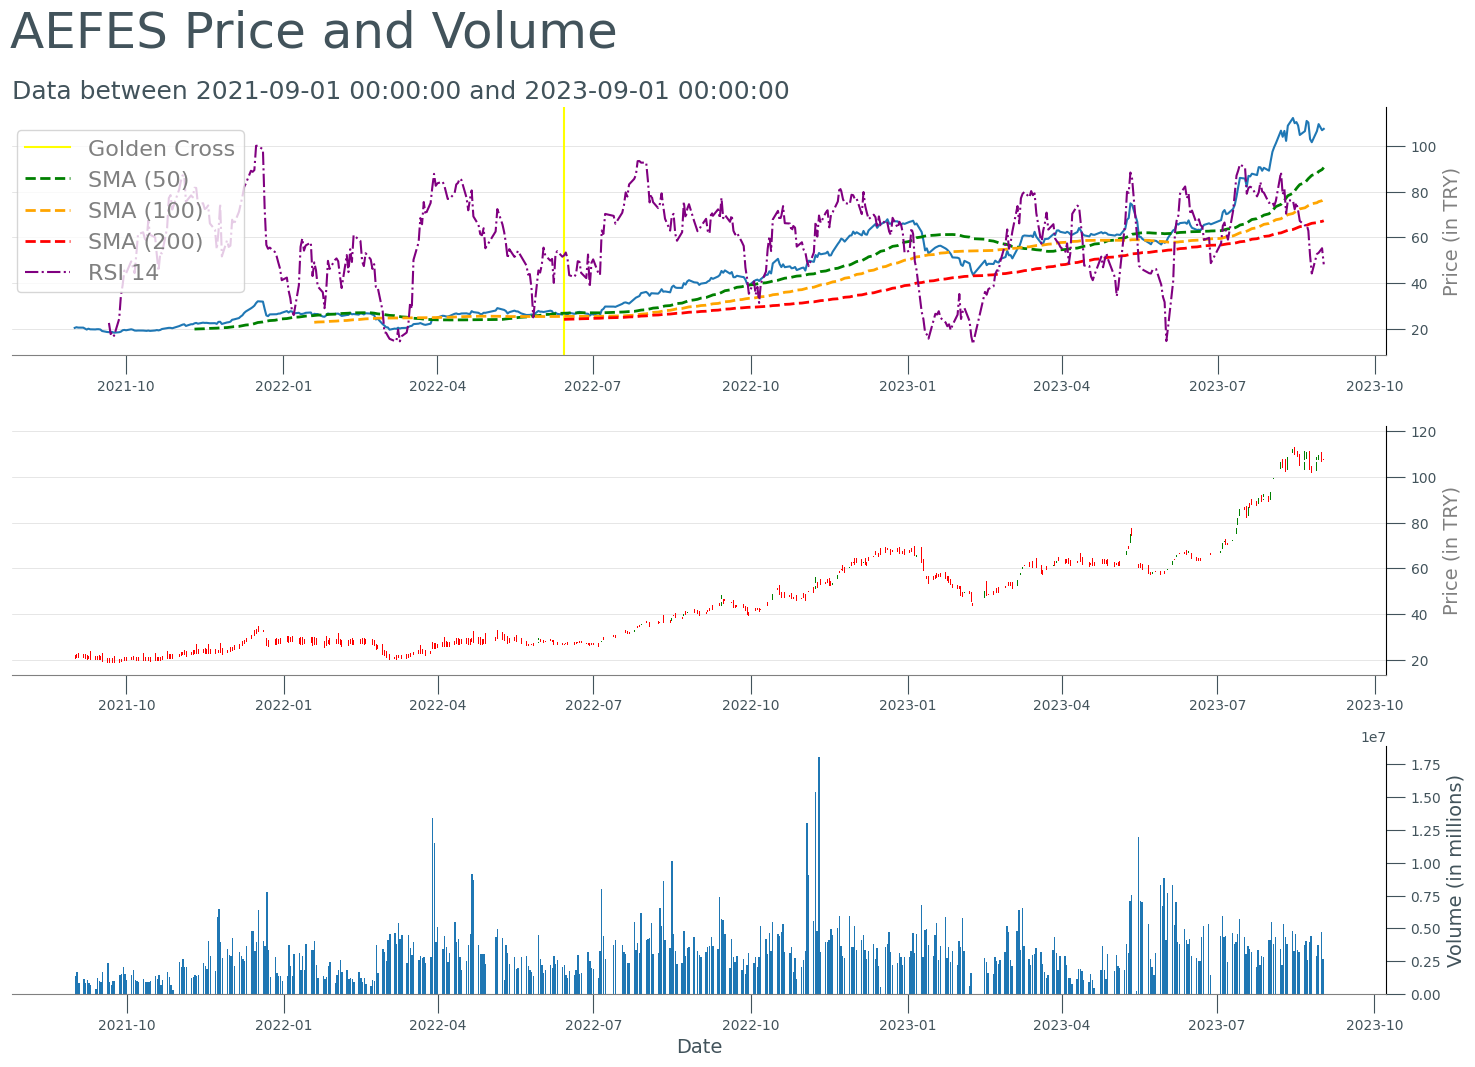

<Figure size 1500x1000 with 0 Axes>

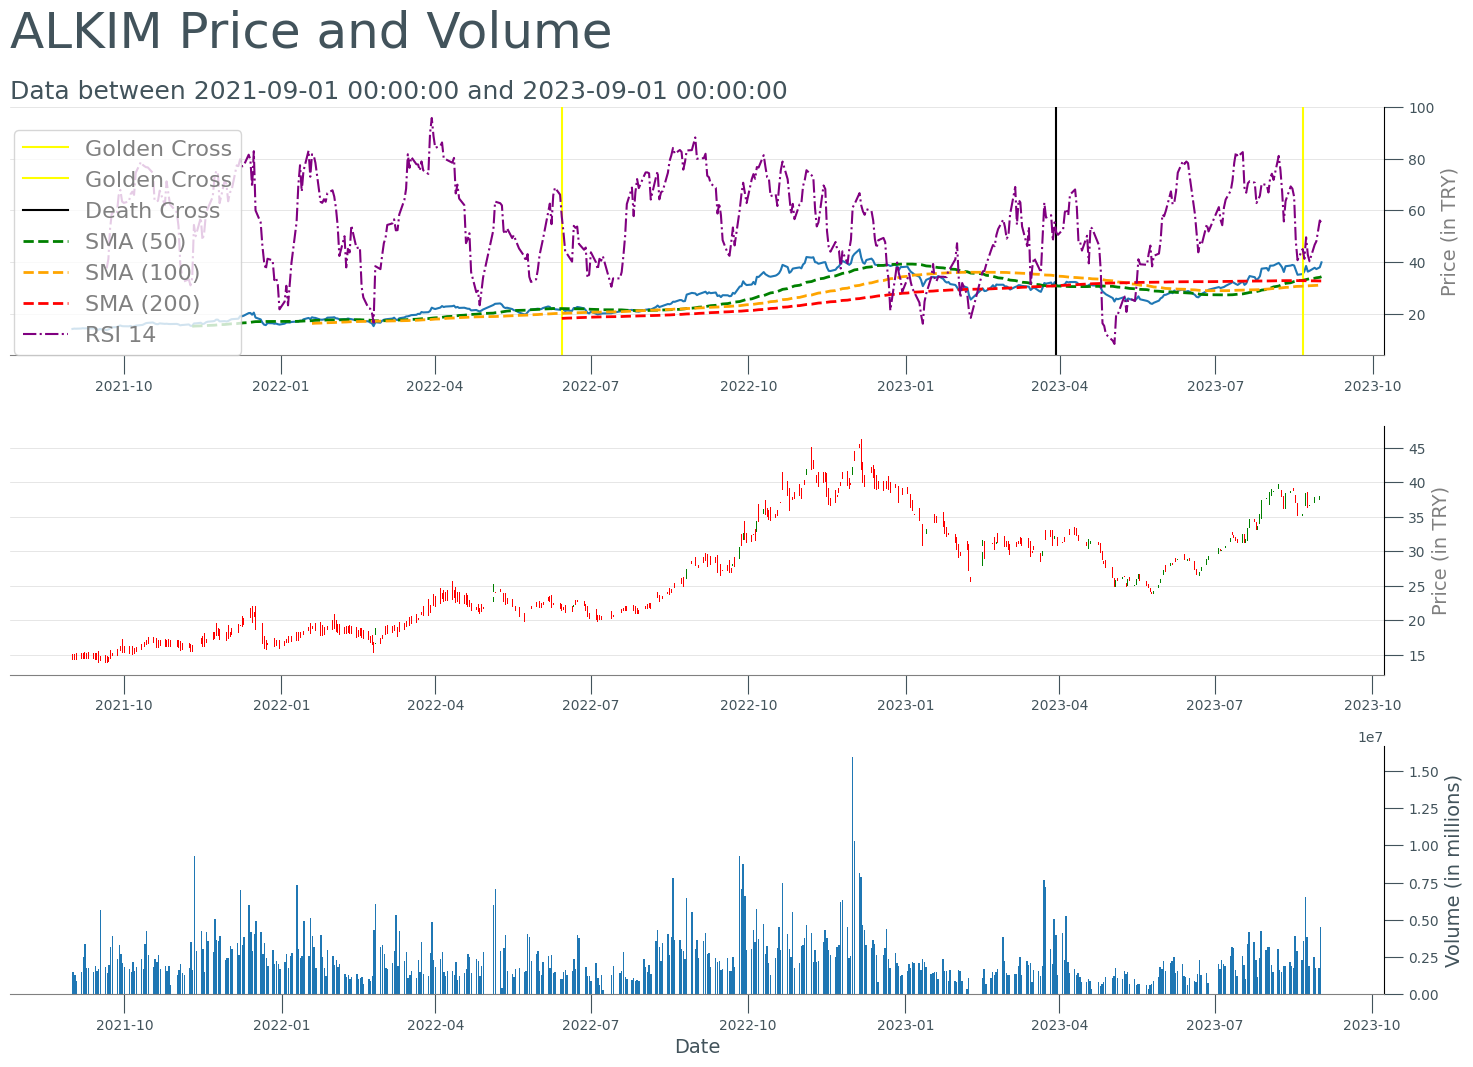

<Figure size 1500x1000 with 0 Axes>

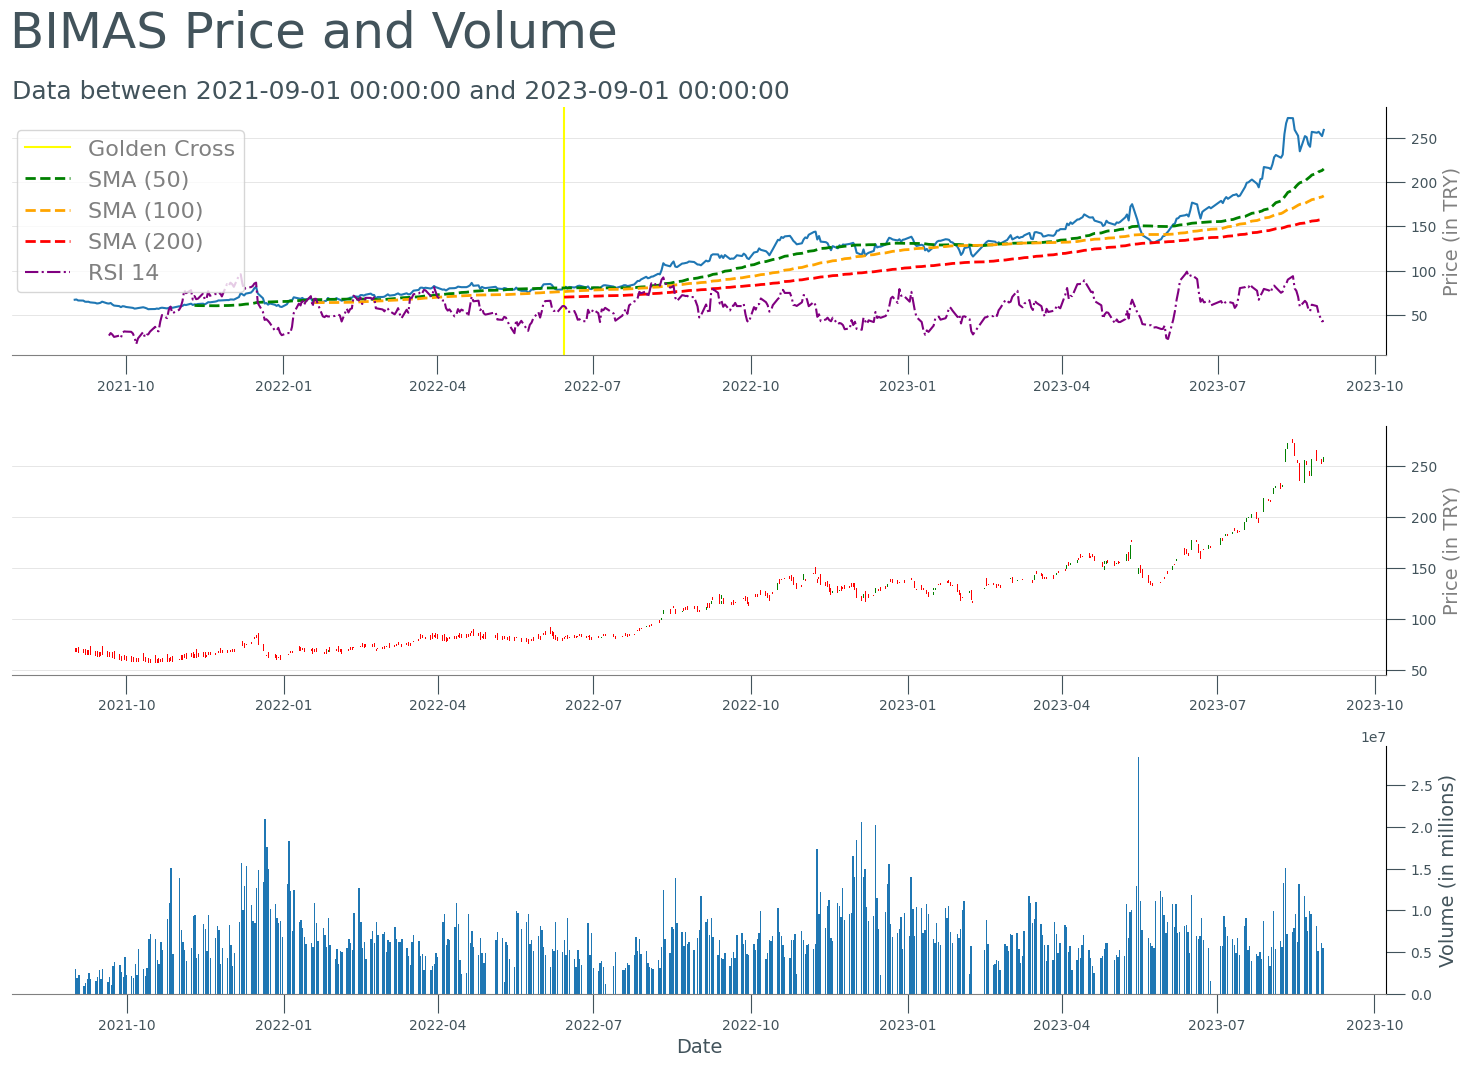

<Figure size 1500x1000 with 0 Axes>

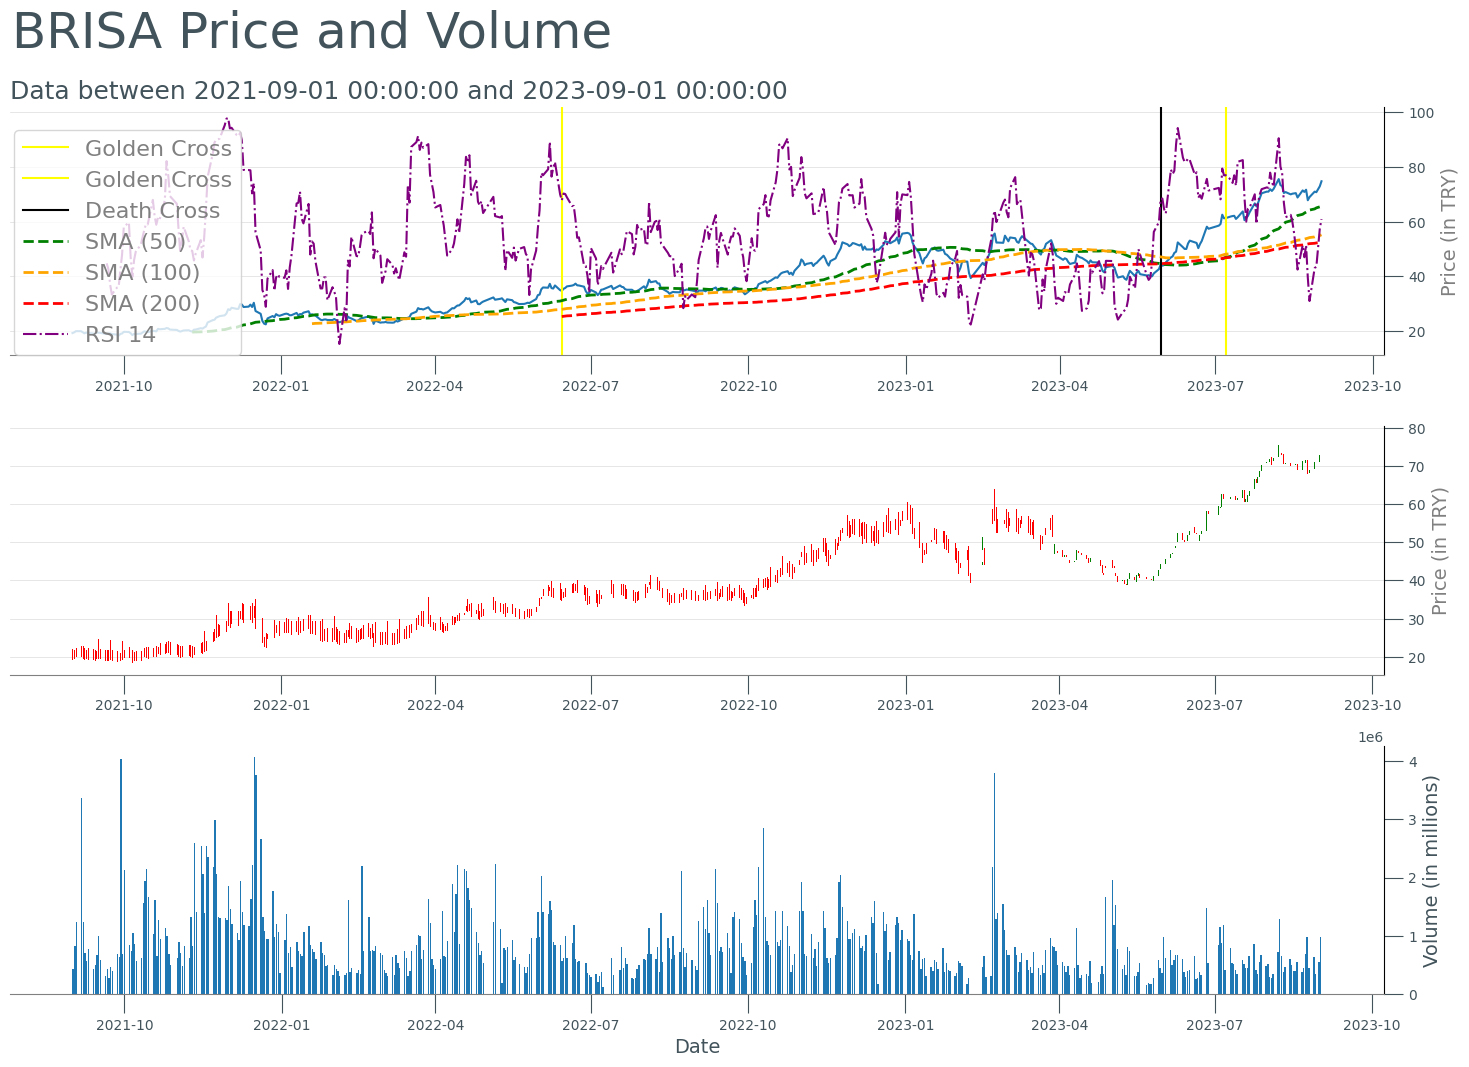

<Figure size 1500x1000 with 0 Axes>

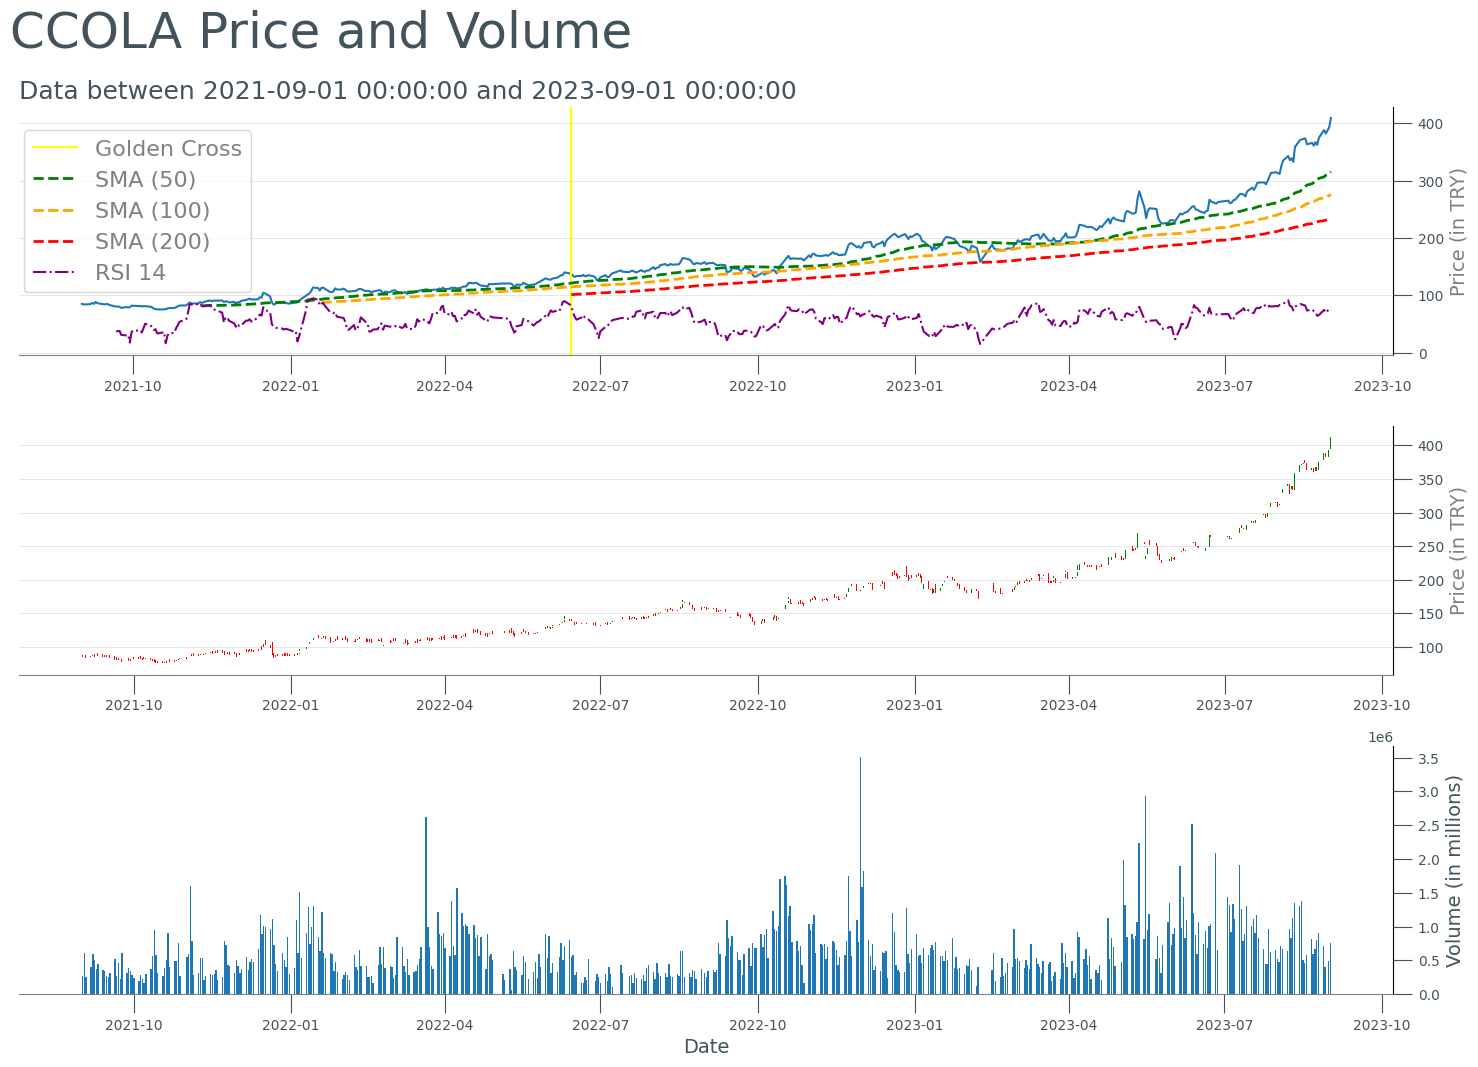

<Figure size 1500x1000 with 0 Axes>

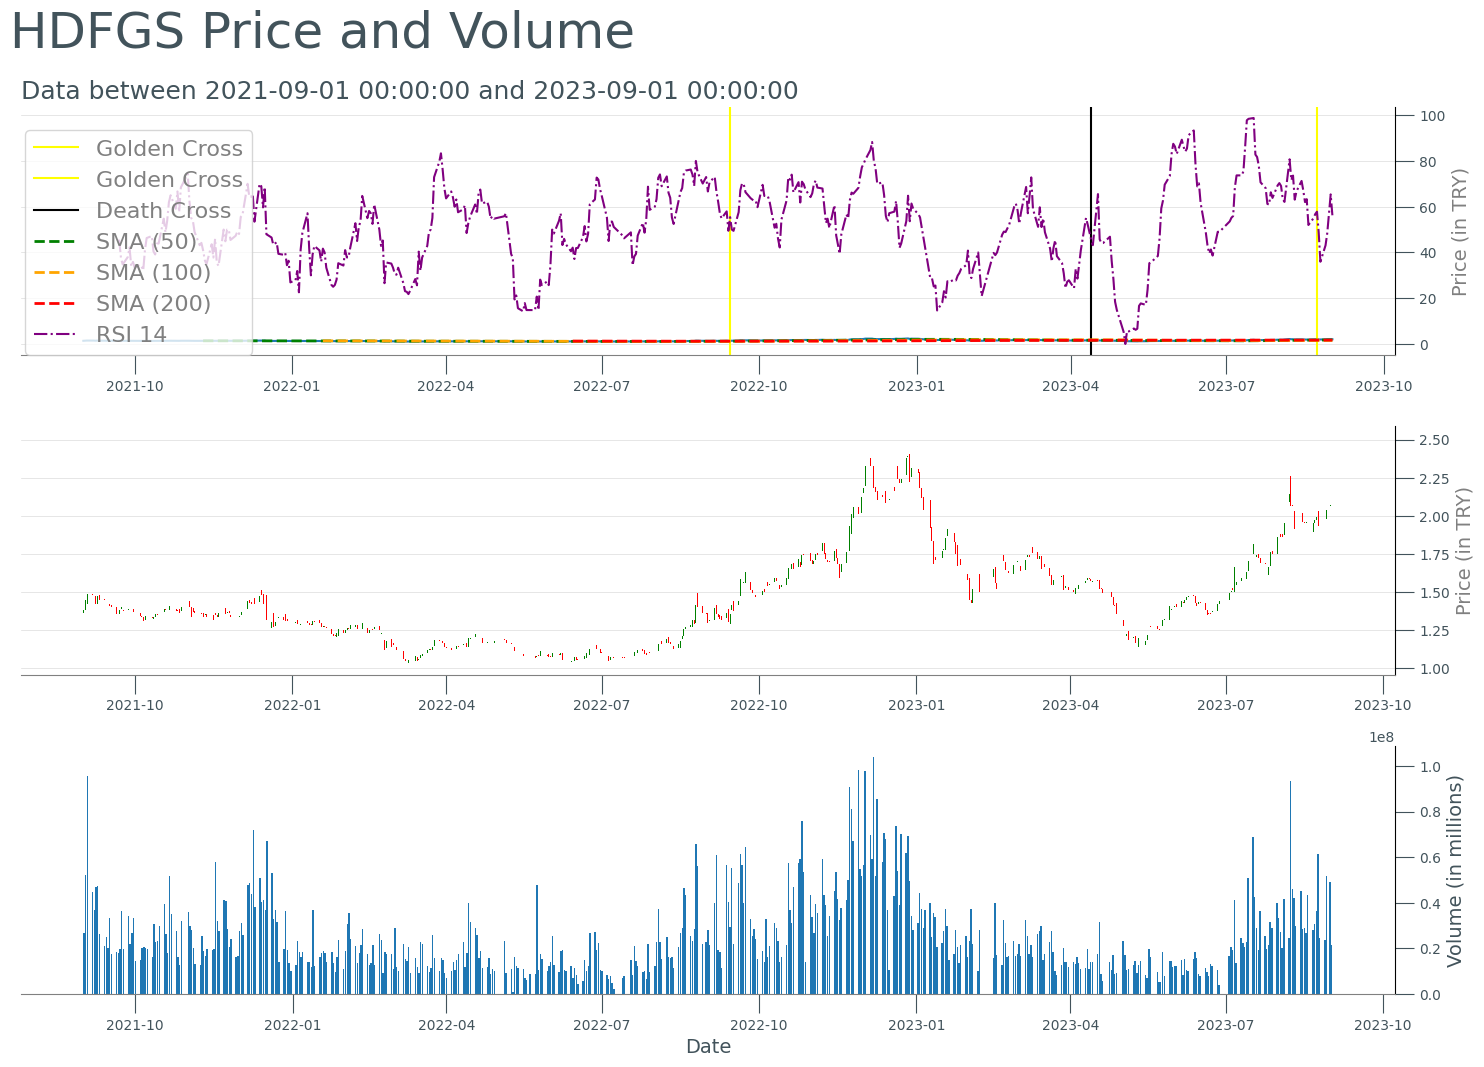

<Figure size 1500x1000 with 0 Axes>

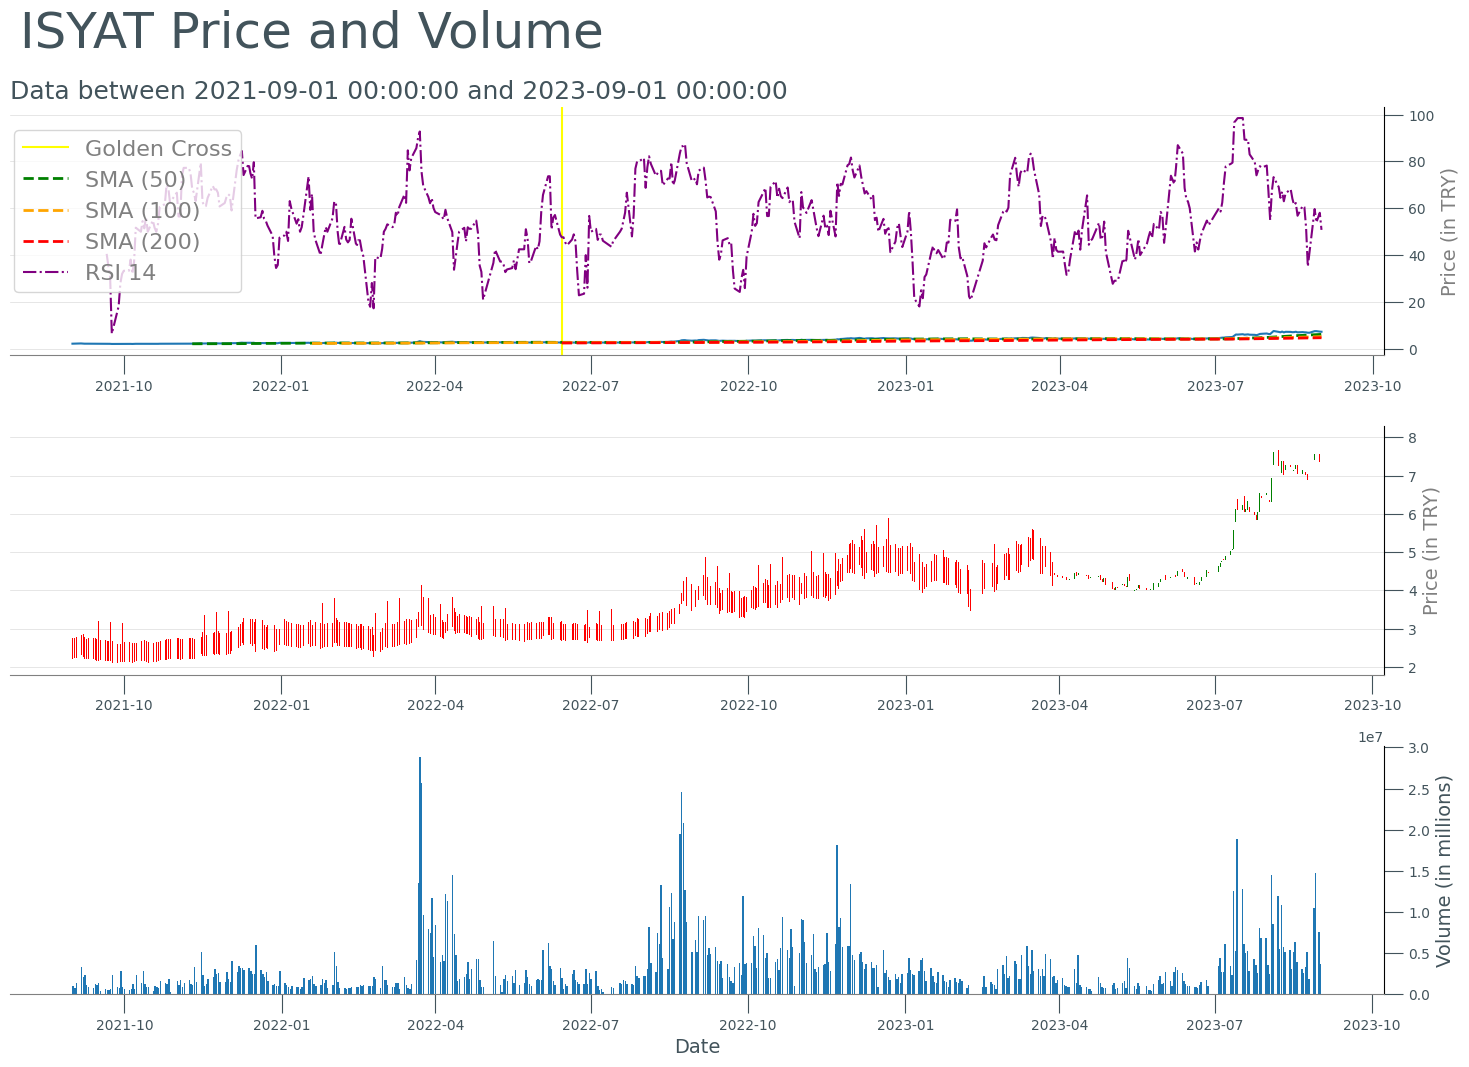

<Figure size 1500x1000 with 0 Axes>

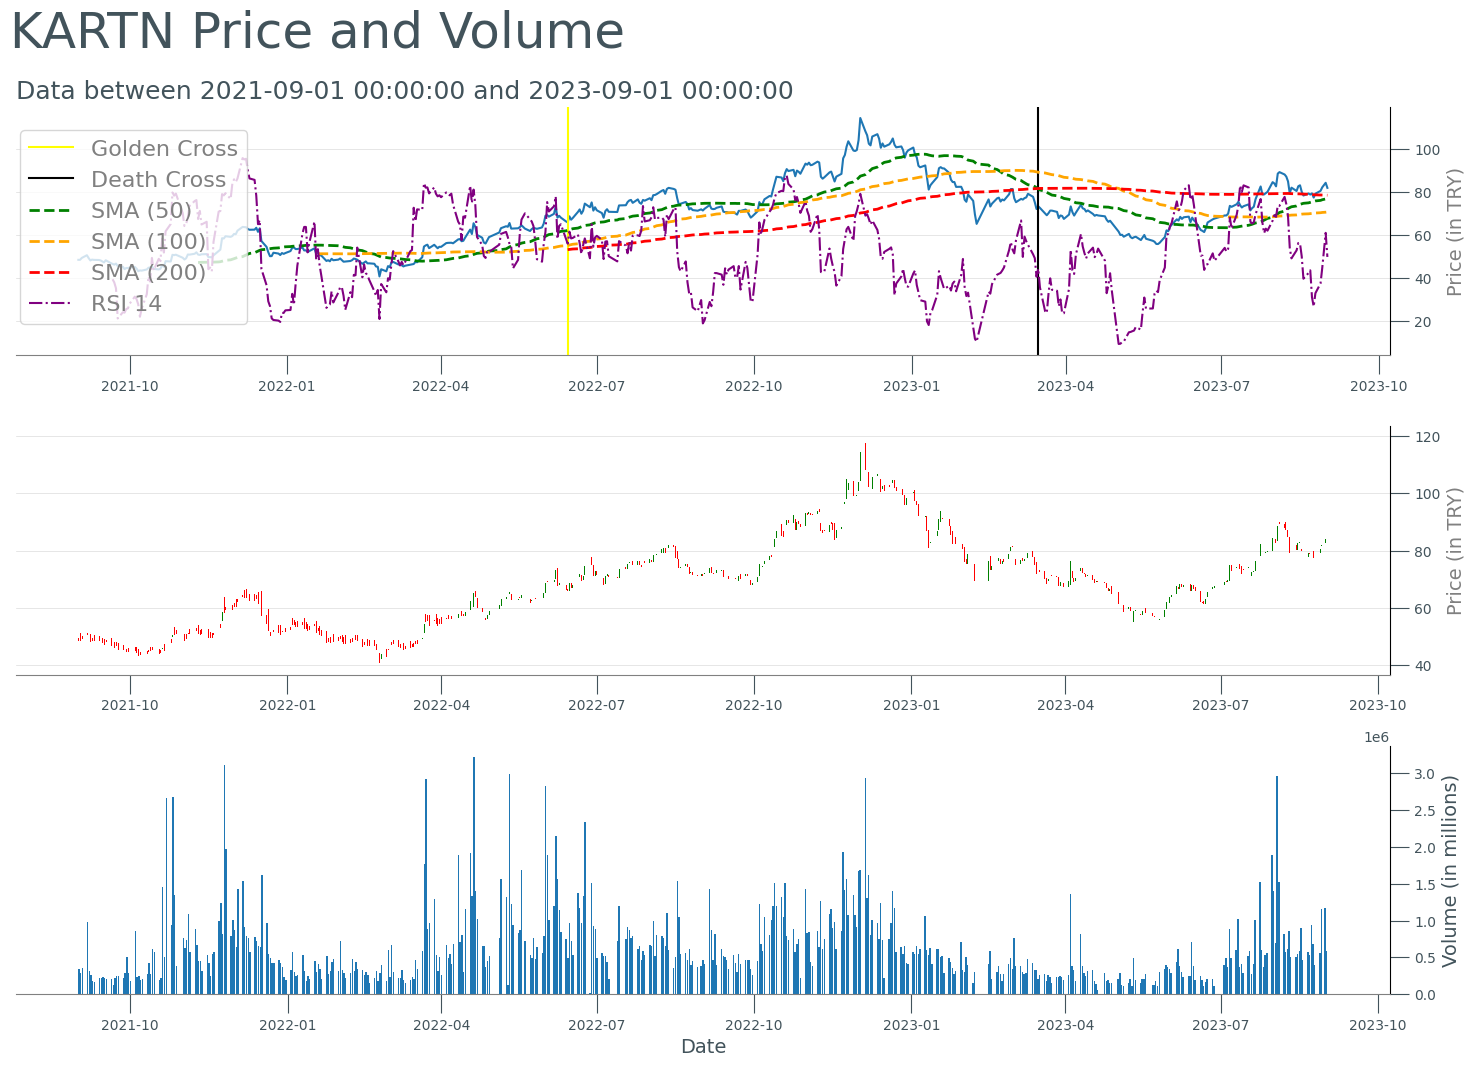

<Figure size 1500x1000 with 0 Axes>

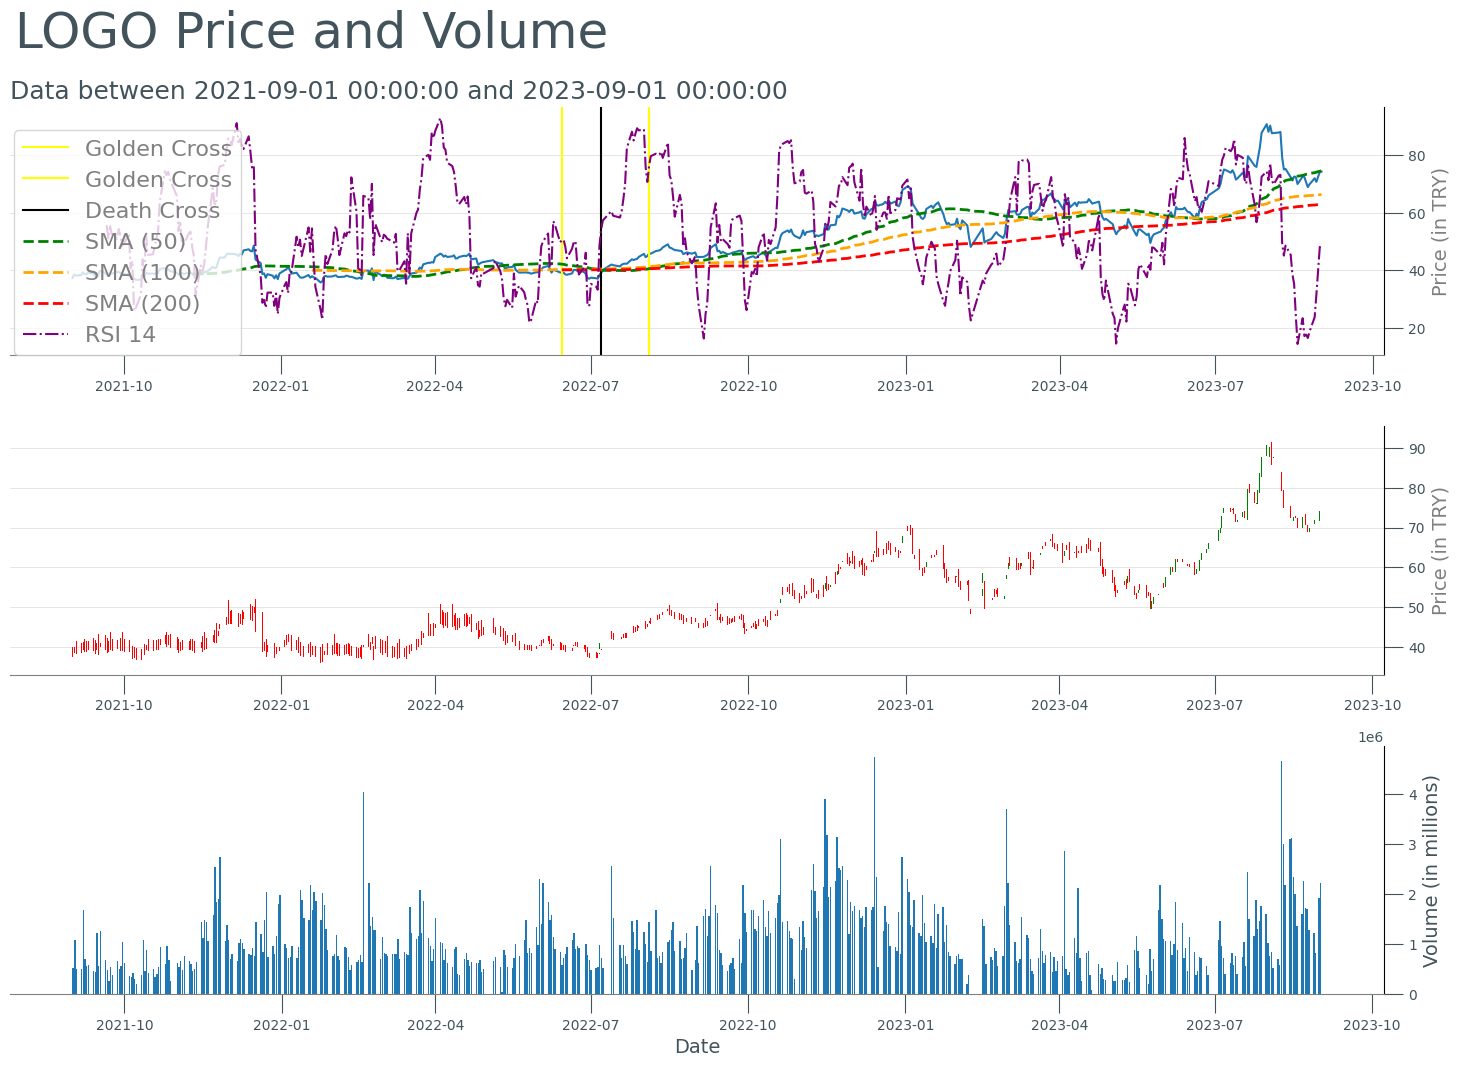

<Figure size 1500x1000 with 0 Axes>

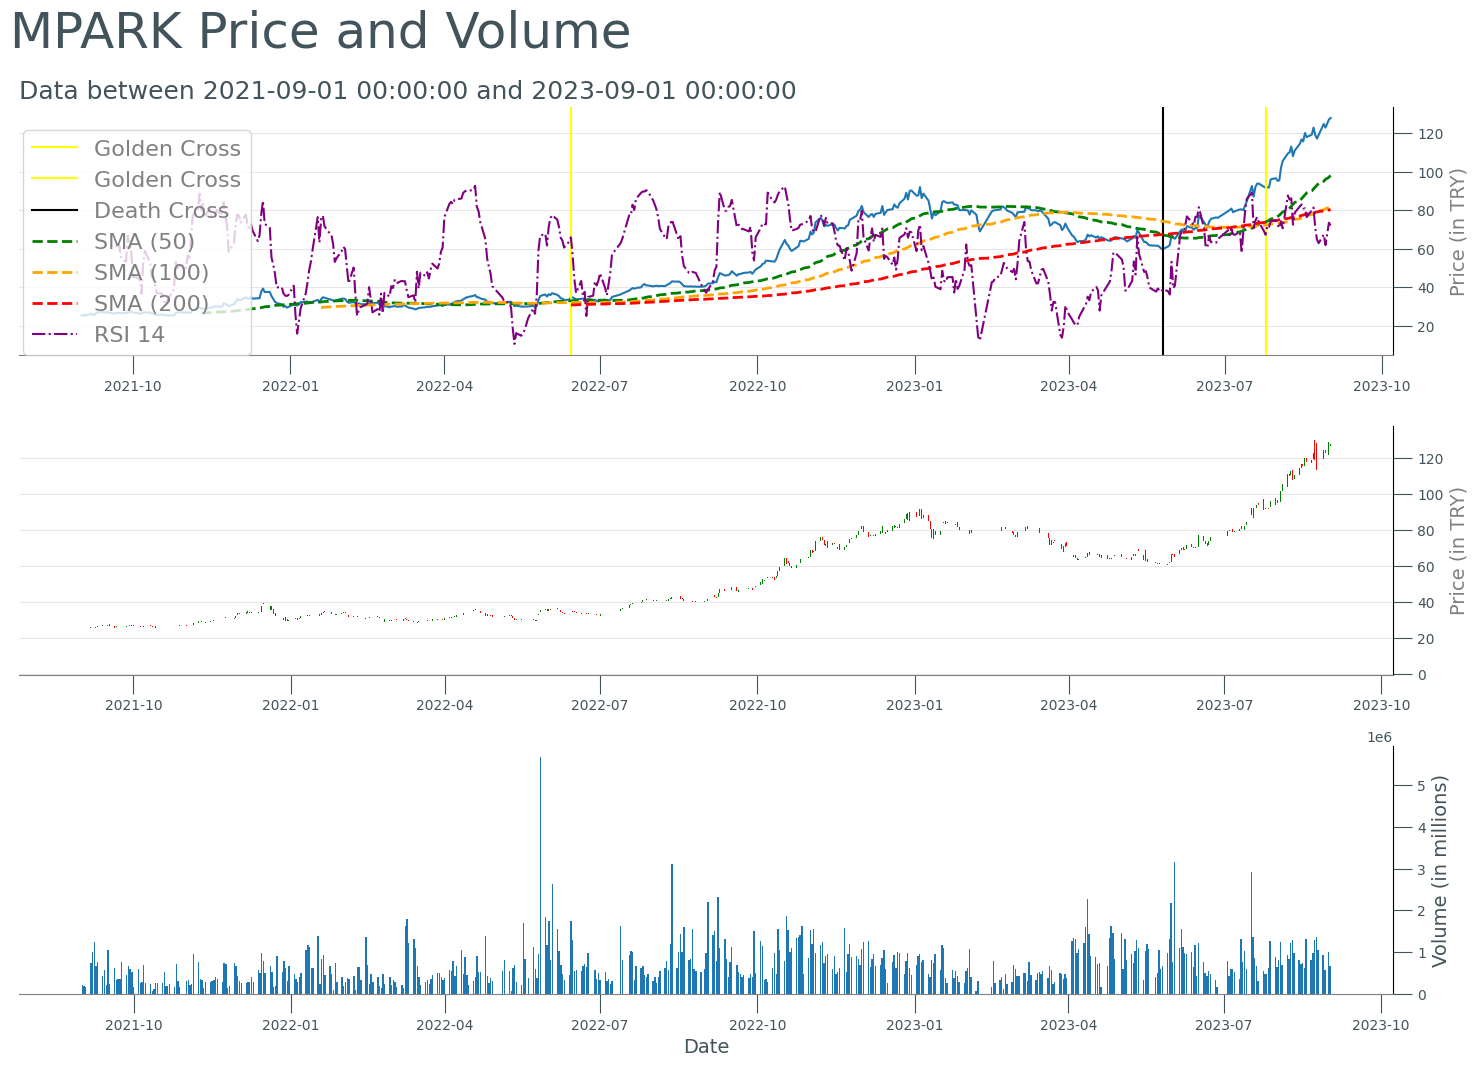

<Figure size 1500x1000 with 0 Axes>

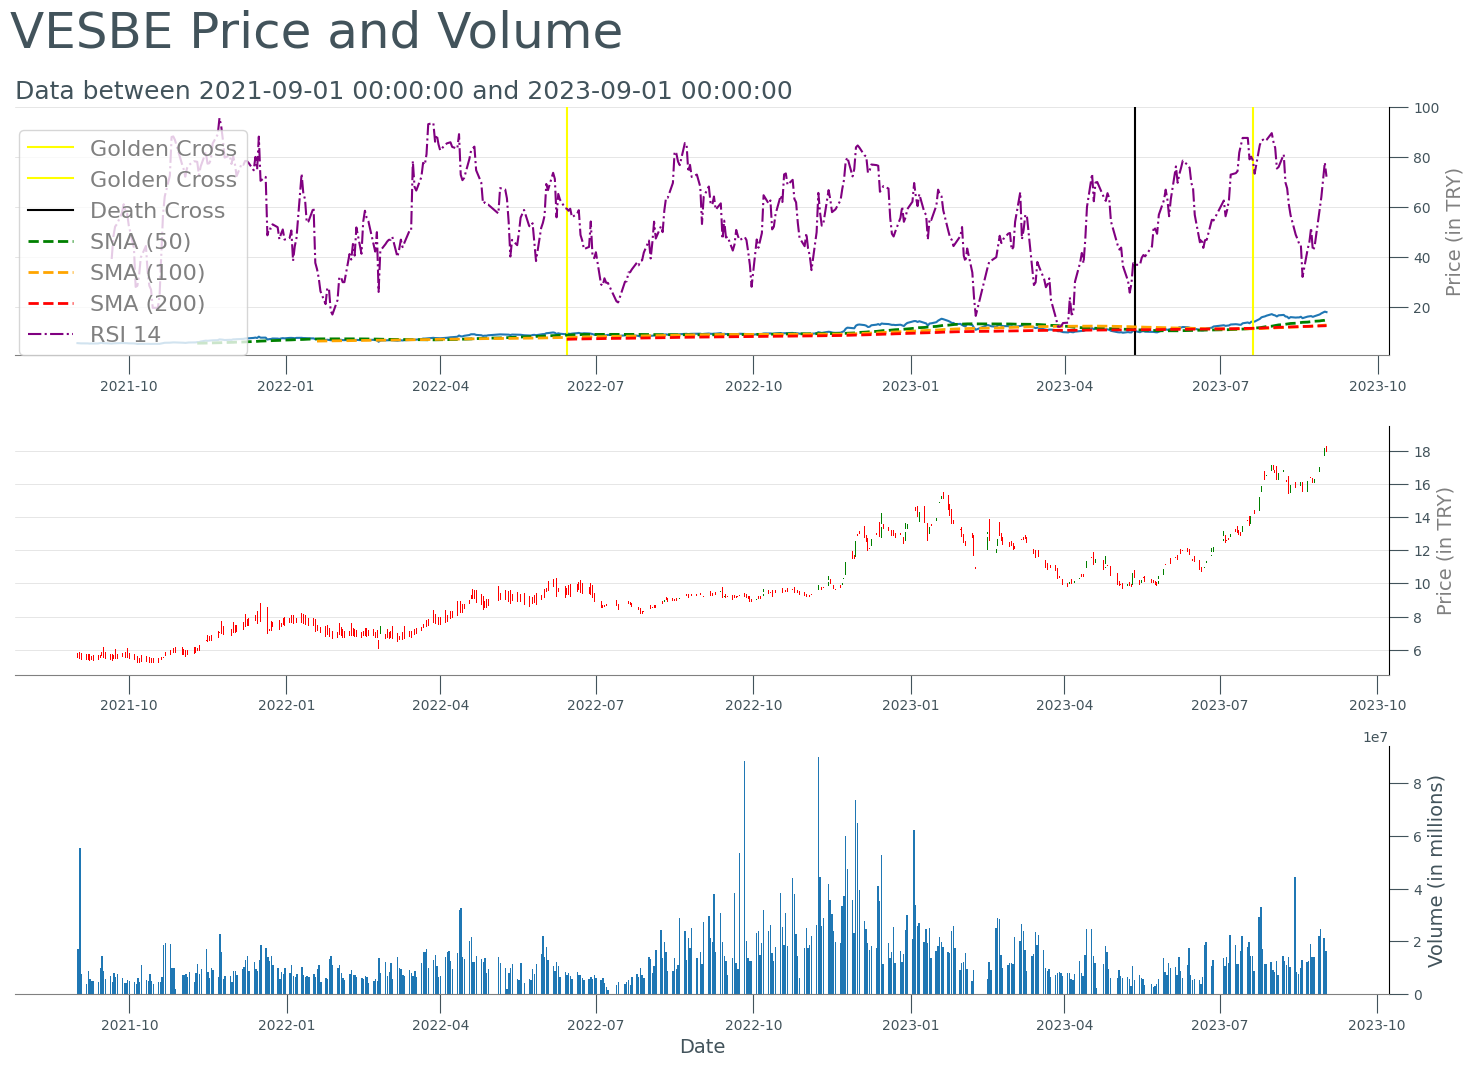

<Figure size 1500x1000 with 0 Axes>

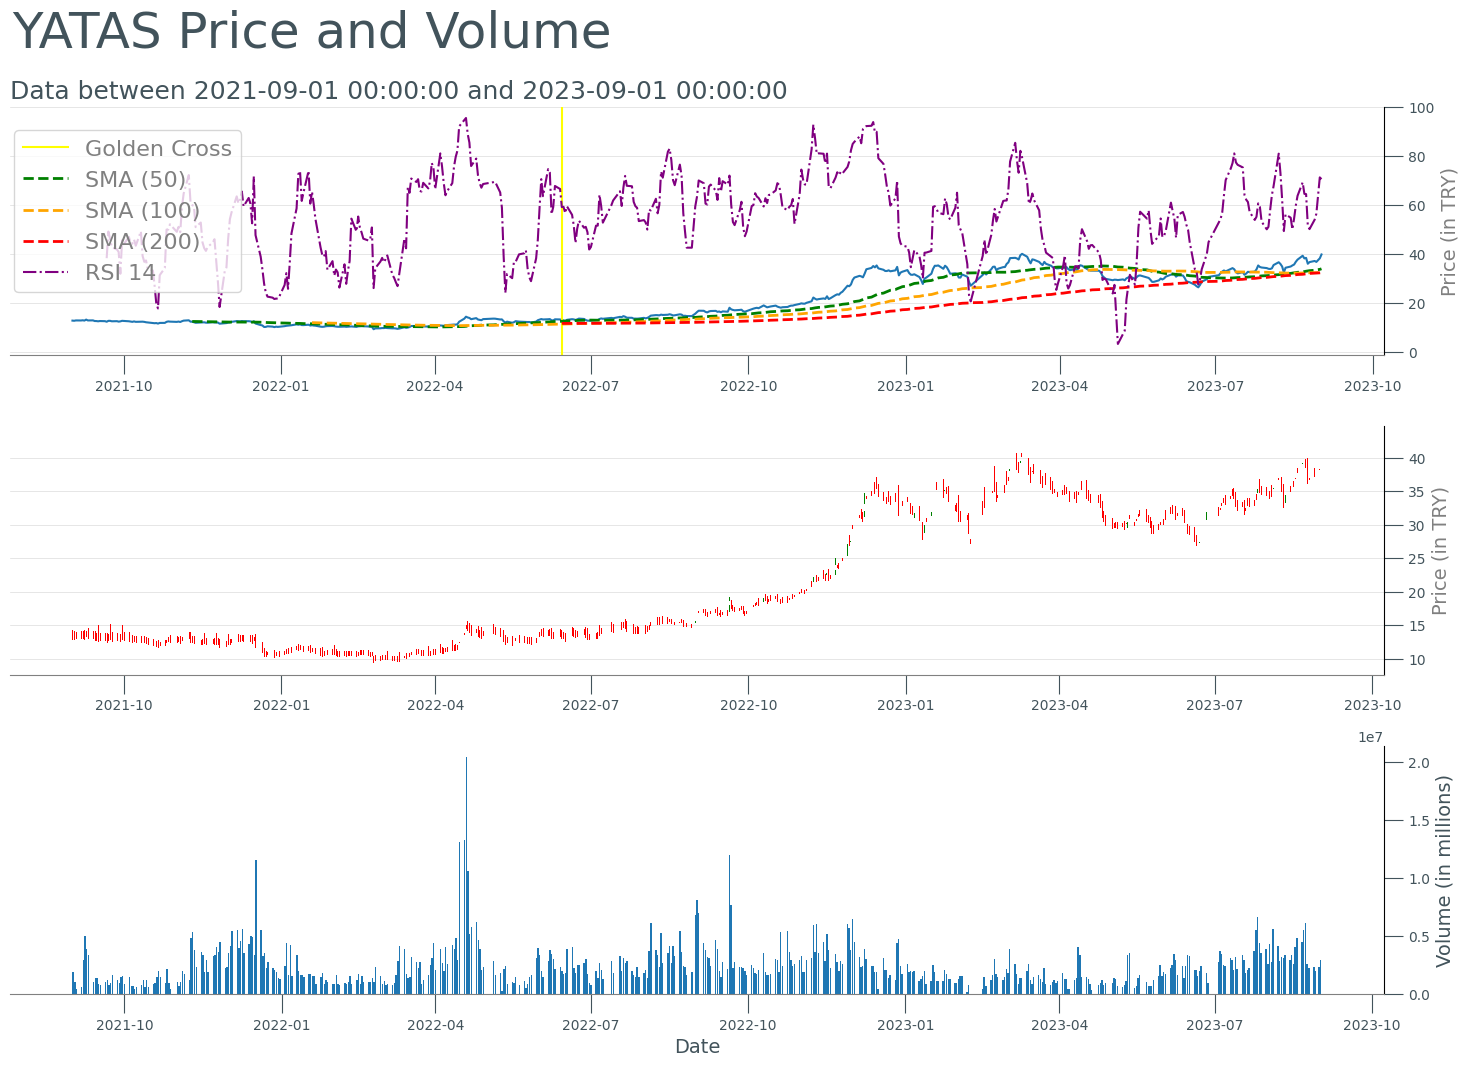

<Figure size 1500x1000 with 0 Axes>

In [13]:
begin = '2021-09-01 00:00:00'
end = '2023-09-01 00:00:00'
for name in chosen_stocks.index:
    get_plot(stocks_info[name],start_date=begin,end_date=end,candle=True,rsi=True,cross_test=True,sma=True);
    

## Building LSTM

In [20]:
# Number of days used for prediction for both LSTM and Monte Carlo
days = 15
for symbol in chosen_stocks.index:
    x_train, y_train = [], []
    stocks_info[symbol].update({'Scale':MinMaxScaler(feature_range=(0,1))})
    stocks_info[symbol].update({'Model':model(days)})
    train_data = stocks_info[symbol]['Stock Data'].loc[(stocks_info[symbol]['Stock Data'].index > begin) 
                                       & (stocks_info[symbol]['Stock Data'].index < end)]
    normal_prices = stocks_info[symbol]['Scale']\
        .fit_transform(train_data['Adj Close'].values.reshape(-1,1))
    for i in range(days, len(normal_prices)):
        x_train.append(normal_prices[i - days: i, 0])
        y_train.append(normal_prices[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    stocks_info[symbol]['Model'].compile(optimizer='adam', loss='mean_squared_error')
    stocks_info[symbol]['Model'].fit(x_train, y_train, batch_size=1, epochs=3)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 15, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3


2023-09-24 11:55:07.819702: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-24 11:55:08.456804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:55:08.678420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:55:08.939476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:55:09.168050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  4/486 [..............................] - ETA: 8s - loss: 0.0272       

2023-09-24 11:55:09.456912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


486/486 [==============================] - 9s 15ms/step - loss: 0.0039
Epoch 2/3
486/486 [==============================] - 7s 15ms/step - loss: 0.0020
Epoch 3/3
486/486 [==============================] - 8s 15ms/step - loss: 0.0011
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 15, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_____________

2023-09-24 11:55:32.799867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:55:33.006698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:55:33.066796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:55:33.150922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  4/486 [..............................] - ETA: 8s - loss: 0.0826  

2023-09-24 11:55:33.266552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


486/486 [==============================] - 9s 16ms/step - loss: 0.0054
Epoch 2/3
486/486 [==============================] - 7s 15ms/step - loss: 0.0033
Epoch 3/3
486/486 [==============================] - 7s 15ms/step - loss: 0.0022
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 15, 100)           40800     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 25)                2525      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_____________

2023-09-24 11:55:56.419350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:55:56.639290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:55:56.696751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:55:56.782807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  4/486 [..............................] - ETA: 9s - loss: 0.0373  

2023-09-24 11:55:56.901228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


486/486 [==============================] - 9s 16ms/step - loss: 0.0044
Epoch 2/3
486/486 [==============================] - 7s 15ms/step - loss: 0.0021
Epoch 3/3
486/486 [==============================] - 8s 16ms/step - loss: 9.9565e-04
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 15, 100)           40800     
                                                                 
 lstm_9 (LSTM)               (None, 100)               80400     
                                                                 
 dense_8 (Dense)             (None, 25)                2525      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________

2023-09-24 11:56:20.217292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:56:20.449858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:56:20.507797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:56:20.609121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  4/486 [..............................] - ETA: 10s - loss: 0.0887  

2023-09-24 11:56:20.738490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


486/486 [==============================] - 10s 17ms/step - loss: 0.0049
Epoch 2/3
486/486 [==============================] - 8s 16ms/step - loss: 0.0021
Epoch 3/3
486/486 [==============================] - 8s 16ms/step - loss: 0.0014
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 15, 100)           40800     
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dense_10 (Dense)            (None, 25)                2525      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
____________

2023-09-24 11:56:45.521935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:56:45.751468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:56:45.813890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:56:45.908804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  4/486 [..............................] - ETA: 10s - loss: 0.0400  

2023-09-24 11:56:46.035608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


486/486 [==============================] - 9s 16ms/step - loss: 0.0028
Epoch 2/3
486/486 [==============================] - 8s 16ms/step - loss: 0.0013
Epoch 3/3
486/486 [==============================] - 8s 16ms/step - loss: 0.0012
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 15, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 100)               80400     
                                                                 
 dense_12 (Dense)            (None, 25)                2525      
                                                                 
 dense_13 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_____________

2023-09-24 11:57:09.825841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:57:10.035627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:57:10.090439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:57:10.179888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  3/486 [..............................] - ETA: 12s - loss: 0.0507 

2023-09-24 11:57:10.300970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


486/486 [==============================] - 8s 15ms/step - loss: 0.0079
Epoch 2/3
486/486 [==============================] - 7s 15ms/step - loss: 0.0037
Epoch 3/3
486/486 [==============================] - 7s 15ms/step - loss: 0.0026
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 15, 100)           40800     
                                                                 
 lstm_15 (LSTM)              (None, 100)               80400     
                                                                 
 dense_14 (Dense)            (None, 25)                2525      
                                                                 
 dense_15 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_____________

2023-09-24 11:57:33.137066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:57:33.352659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:57:33.409625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:57:33.496464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  4/486 [..............................] - ETA: 11s - loss: 0.0271 

2023-09-24 11:57:33.622251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


486/486 [==============================] - 9s 16ms/step - loss: 0.0055
Epoch 2/3
486/486 [==============================] - 7s 15ms/step - loss: 0.0019
Epoch 3/3
486/486 [==============================] - 7s 15ms/step - loss: 0.0021
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 15, 100)           40800     
                                                                 
 lstm_17 (LSTM)              (None, 100)               80400     
                                                                 
 dense_16 (Dense)            (None, 25)                2525      
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_____________

2023-09-24 11:57:57.660826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:57:57.876479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:57:57.940490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:57:58.044232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  3/486 [..............................] - ETA: 15s - loss: 0.2722  

2023-09-24 11:57:58.187757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


486/486 [==============================] - 10s 16ms/step - loss: 0.0080
Epoch 2/3
486/486 [==============================] - 8s 15ms/step - loss: 0.0029
Epoch 3/3
486/486 [==============================] - 8s 16ms/step - loss: 0.0022
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 15, 100)           40800     
                                                                 
 lstm_19 (LSTM)              (None, 100)               80400     
                                                                 
 dense_18 (Dense)            (None, 25)                2525      
                                                                 
 dense_19 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
____________

2023-09-24 11:58:21.784318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:58:21.995961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:58:22.059504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:58:22.164423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  3/486 [..............................] - ETA: 14s - loss: 0.0083      

2023-09-24 11:58:22.314005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


486/486 [==============================] - 9s 15ms/step - loss: 0.0061
Epoch 2/3
486/486 [==============================] - 7s 15ms/step - loss: 0.0024
Epoch 3/3
486/486 [==============================] - 7s 15ms/step - loss: 0.0019
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 15, 100)           40800     
                                                                 
 lstm_21 (LSTM)              (None, 100)               80400     
                                                                 
 dense_20 (Dense)            (None, 25)                2525      
                                                                 
 dense_21 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
____________

2023-09-24 11:58:45.484886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:58:45.701444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:58:45.764637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:58:45.872081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/486 [..............................] - ETA: 10:07 - loss: 0.0039

2023-09-24 11:58:46.020687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


486/486 [==============================] - 9s 15ms/step - loss: 0.0036
Epoch 2/3
486/486 [==============================] - 7s 15ms/step - loss: 0.0015
Epoch 3/3
486/486 [==============================] - 7s 15ms/step - loss: 9.9413e-04
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 15, 100)           40800     
                                                                 
 lstm_23 (LSTM)              (None, 100)               80400     
                                                                 
 dense_22 (Dense)            (None, 25)                2525      
                                                                 
 dense_23 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
________

2023-09-24 11:59:09.068562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:59:09.282683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:59:09.342695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:59:09.449516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/486 [..............................] - ETA: 10:09 - loss: 0.7505

2023-09-24 11:59:09.593844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


486/486 [==============================] - 9s 16ms/step - loss: 0.0064
Epoch 2/3
486/486 [==============================] - 7s 15ms/step - loss: 0.0027
Epoch 3/3
486/486 [==============================] - 7s 15ms/step - loss: 0.0021
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 15, 100)           40800     
                                                                 
 lstm_25 (LSTM)              (None, 100)               80400     
                                                                 
 dense_24 (Dense)            (None, 25)                2525      
                                                                 
 dense_25 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
____________

2023-09-24 11:59:32.788350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:59:33.004251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:59:33.069065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-24 11:59:33.170892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  3/486 [..............................] - ETA: 15s - loss: 0.0023      

2023-09-24 11:59:33.320859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


486/486 [==============================] - 9s 16ms/step - loss: 0.0059
Epoch 2/3
486/486 [==============================] - 7s 15ms/step - loss: 0.0030
Epoch 3/3
486/486 [==============================] - 7s 15ms/step - loss: 0.0017


In [28]:
with open('stocks_with_models.pkl', 'wb') as stocks_all:
    pickle.dump(stocks_info, stocks_all)

INFO:tensorflow:Assets written to: ram://71392812-0f64-4486-96a1-cd37d0d8d5b4/assets


INFO:tensorflow:Assets written to: ram://71392812-0f64-4486-96a1-cd37d0d8d5b4/assets


INFO:tensorflow:Assets written to: ram://894c8385-8ab4-498e-95b8-06010da40a2e/assets


INFO:tensorflow:Assets written to: ram://894c8385-8ab4-498e-95b8-06010da40a2e/assets


INFO:tensorflow:Assets written to: ram://be7daa55-b5fc-40f9-b3eb-e256291e8a6c/assets


INFO:tensorflow:Assets written to: ram://be7daa55-b5fc-40f9-b3eb-e256291e8a6c/assets


INFO:tensorflow:Assets written to: ram://309a2b77-aac4-44cd-9c74-915783dbbb9f/assets


INFO:tensorflow:Assets written to: ram://309a2b77-aac4-44cd-9c74-915783dbbb9f/assets


INFO:tensorflow:Assets written to: ram://961dc40c-fba9-4efe-8a91-957721ff87b4/assets


INFO:tensorflow:Assets written to: ram://961dc40c-fba9-4efe-8a91-957721ff87b4/assets


INFO:tensorflow:Assets written to: ram://0186227e-01f5-4f1e-b31b-015f8d4c5770/assets


INFO:tensorflow:Assets written to: ram://0186227e-01f5-4f1e-b31b-015f8d4c5770/assets


INFO:tensorflow:Assets written to: ram://4b997af4-a0ea-4368-9b15-9eae73972b05/assets


INFO:tensorflow:Assets written to: ram://4b997af4-a0ea-4368-9b15-9eae73972b05/assets


INFO:tensorflow:Assets written to: ram://7a6cc859-3f84-474a-8517-ad612efbcc48/assets


INFO:tensorflow:Assets written to: ram://7a6cc859-3f84-474a-8517-ad612efbcc48/assets


INFO:tensorflow:Assets written to: ram://170d520f-bd48-41ca-b8c1-6b8c5ea19ccc/assets


INFO:tensorflow:Assets written to: ram://170d520f-bd48-41ca-b8c1-6b8c5ea19ccc/assets


INFO:tensorflow:Assets written to: ram://5703fc9b-bd64-404a-affb-7392cb57aa84/assets


INFO:tensorflow:Assets written to: ram://5703fc9b-bd64-404a-affb-7392cb57aa84/assets


INFO:tensorflow:Assets written to: ram://15741f13-dfc8-4fd5-b624-a5a89bdeed02/assets


INFO:tensorflow:Assets written to: ram://15741f13-dfc8-4fd5-b624-a5a89bdeed02/assets


INFO:tensorflow:Assets written to: ram://aeeae892-a761-489e-9a0f-381b288b5ce3/assets


INFO:tensorflow:Assets written to: ram://aeeae892-a761-489e-9a0f-381b288b5ce3/assets


## Predictions

In [52]:
predicted = {}
for stock in chosen_stocks.index:
    train_data = stocks_info[stock]['Stock Data'].loc[(stocks_info[stock]['Stock Data'].index > begin) 
                                       & (stocks_info[stock]['Stock Data'].index < end)]
    predicted[stock]= {'LSTM':0, 'MC': MC_daily_returns(train_data, days, 100000)[0]}
    prices = train_data['Adj Close'].values
    predicted_prices = []
    for i in range(days):
        scaled_prices = stocks_info[stock]['Scale'].fit_transform(prices.reshape(-1,1))
        test_prices = scaled_prices[len(prices)-days:]
        predicted_price =  stocks_info[stock]['Model'].predict(np.reshape(test_prices,
                                                                       (test_prices.shape[1],test_prices.shape[0],1)))
        predicted_price = stocks_info[stock]['Scale'].inverse_transform(predicted_price)
        predicted_prices.append(predicted_price)
        prices = np.append(prices, predicted_price)
    predicted[stock]['LSTM'] = predicted_prices   

1/1 [==============================] - 0s 16ms/step


## Visualization of Results

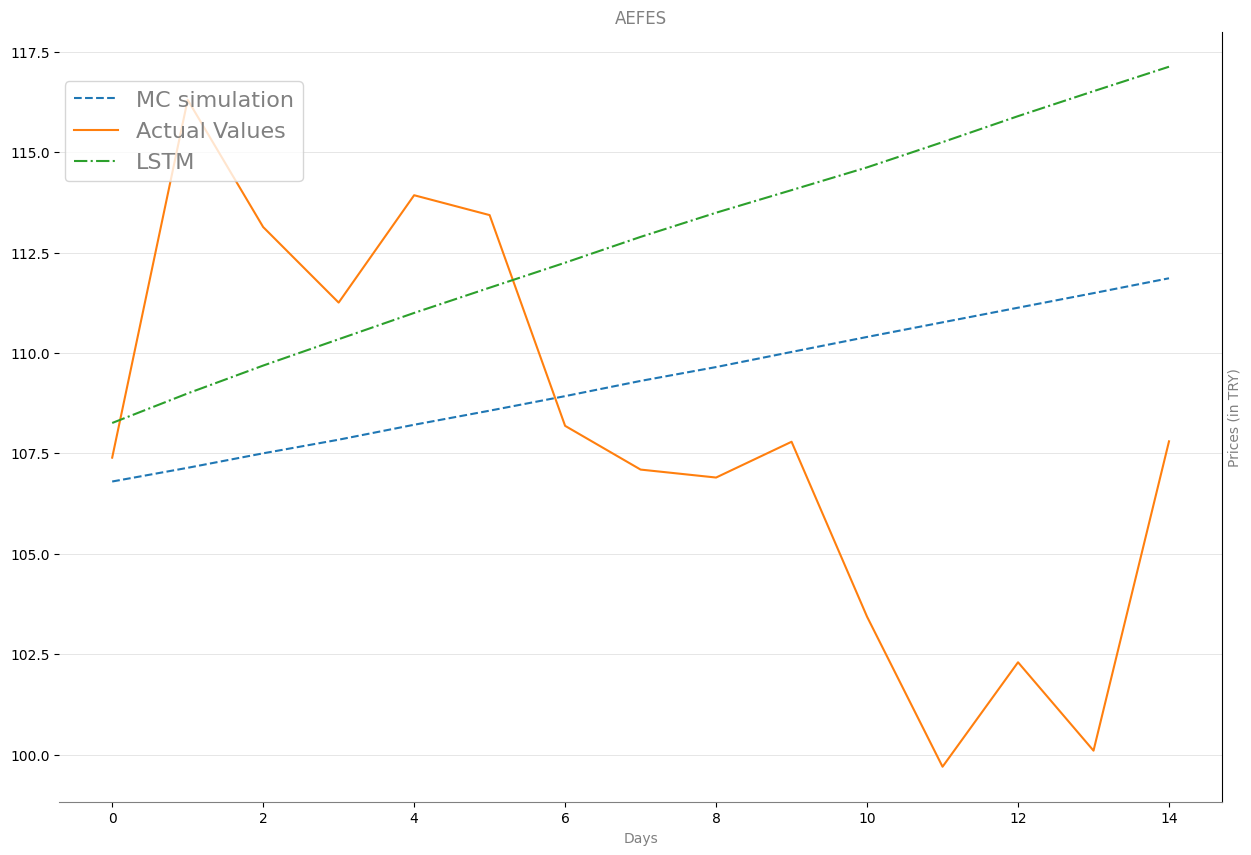

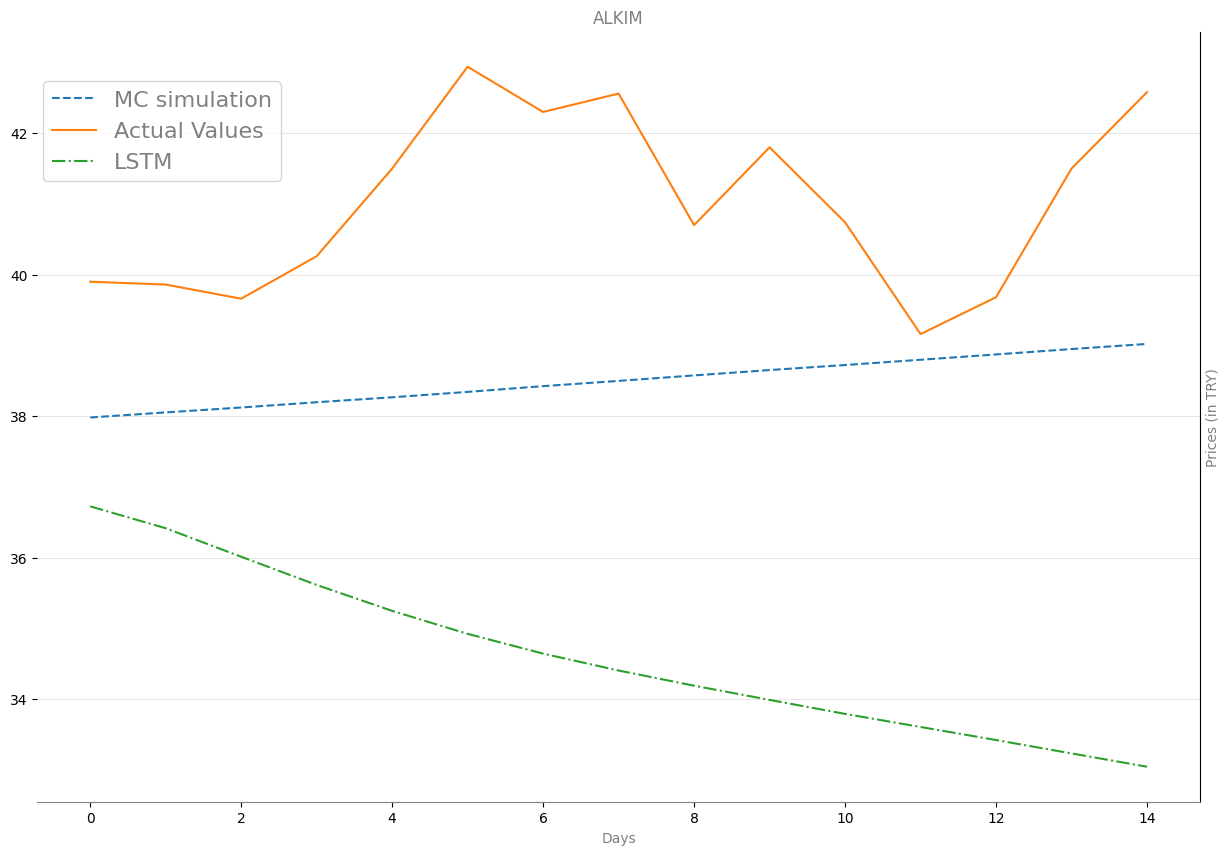

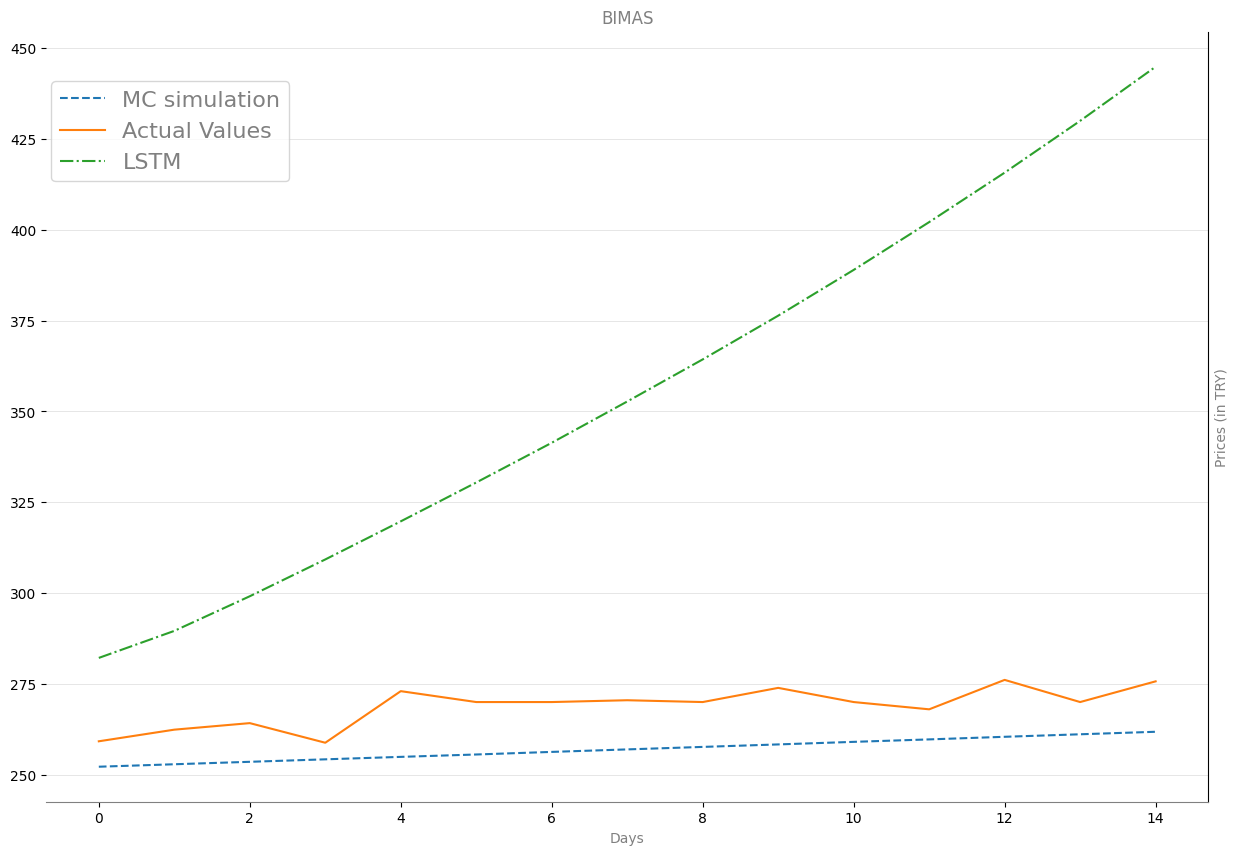

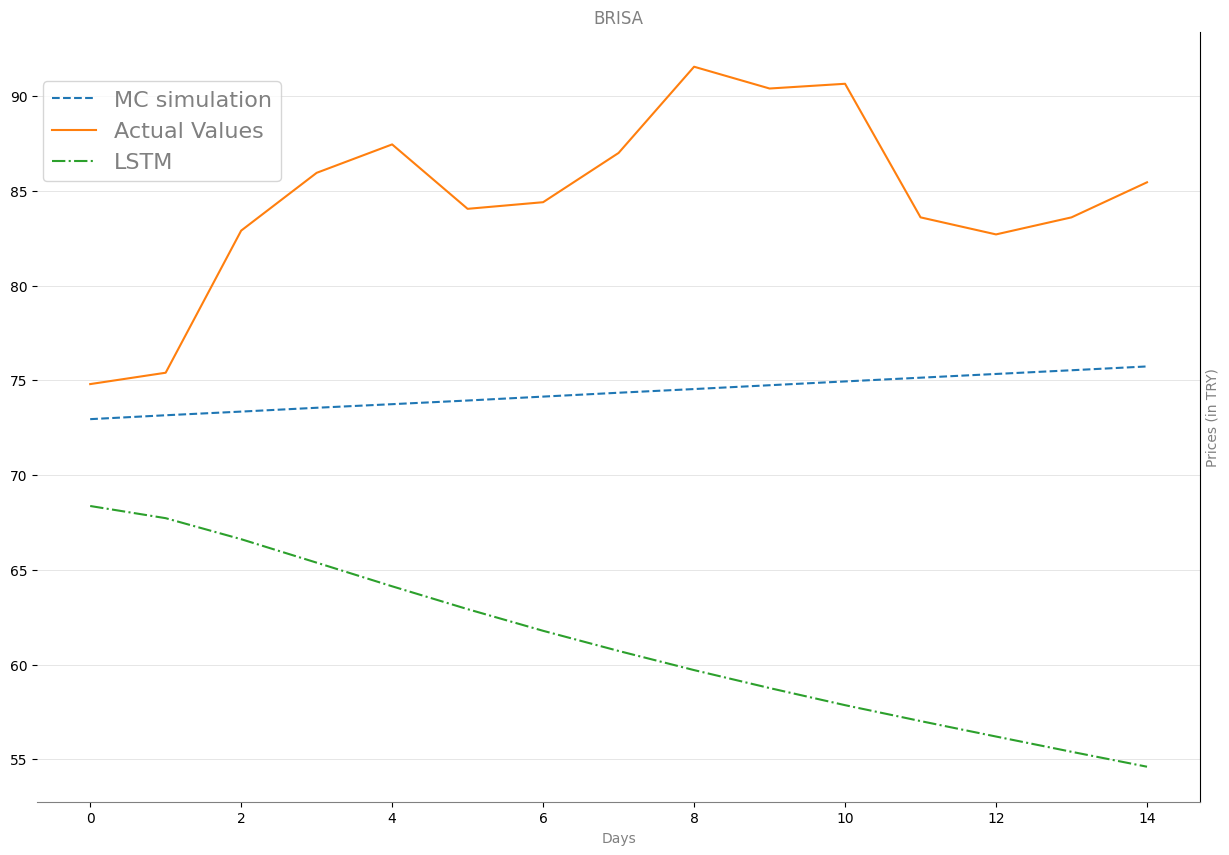

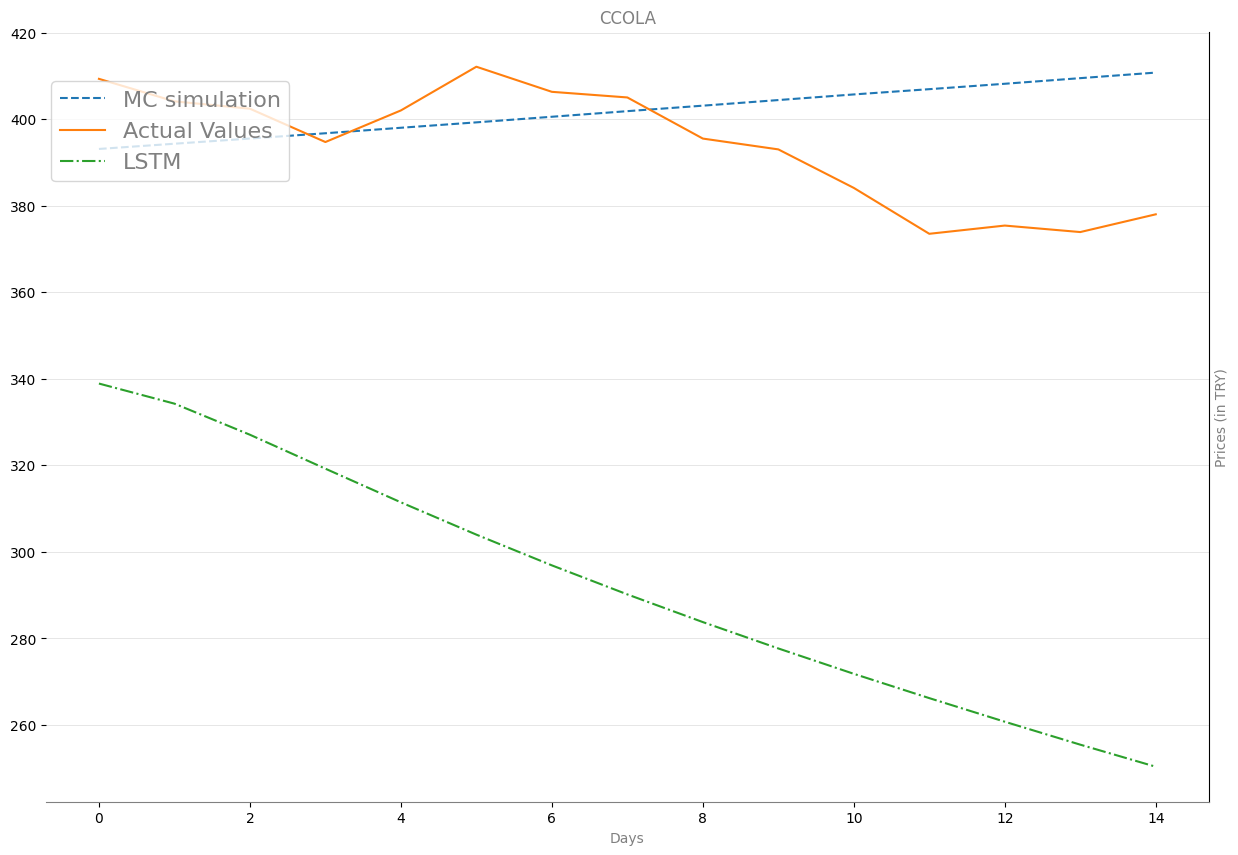

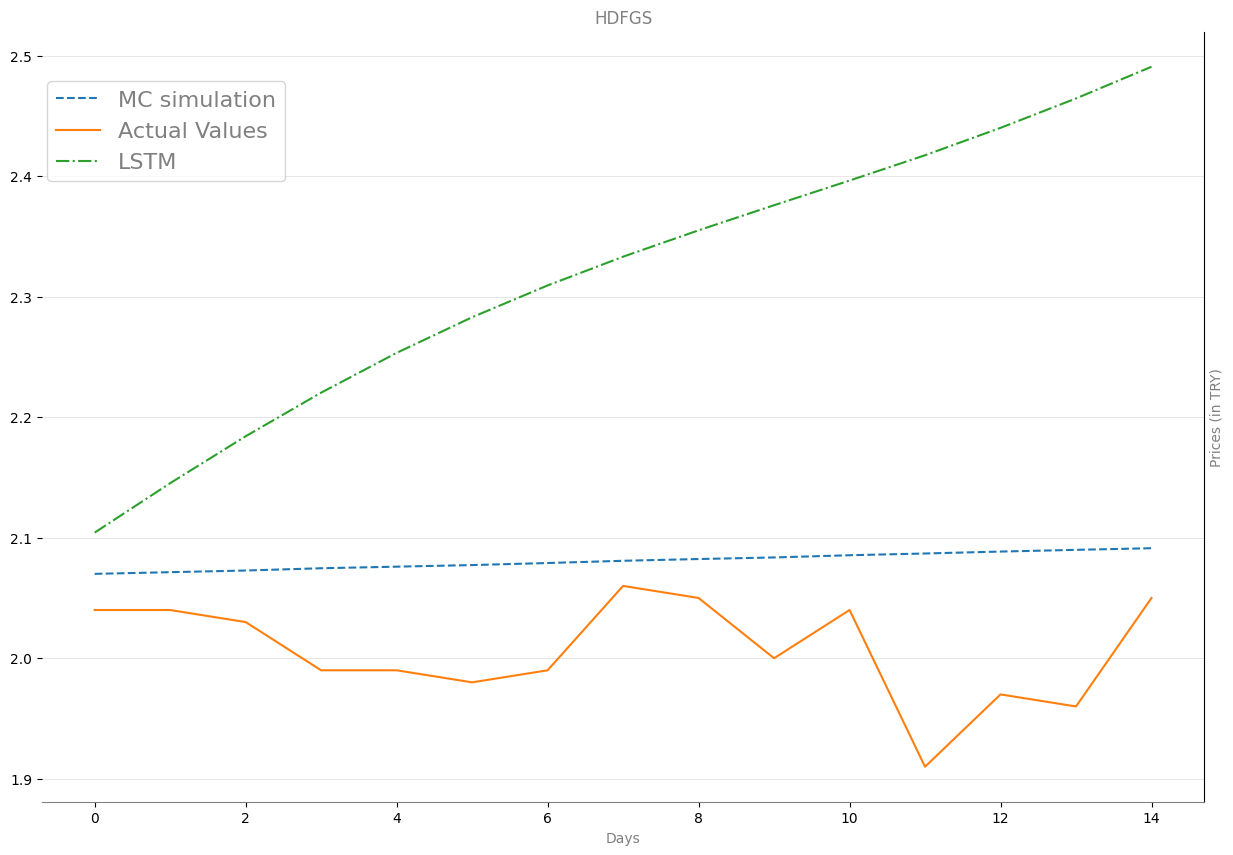

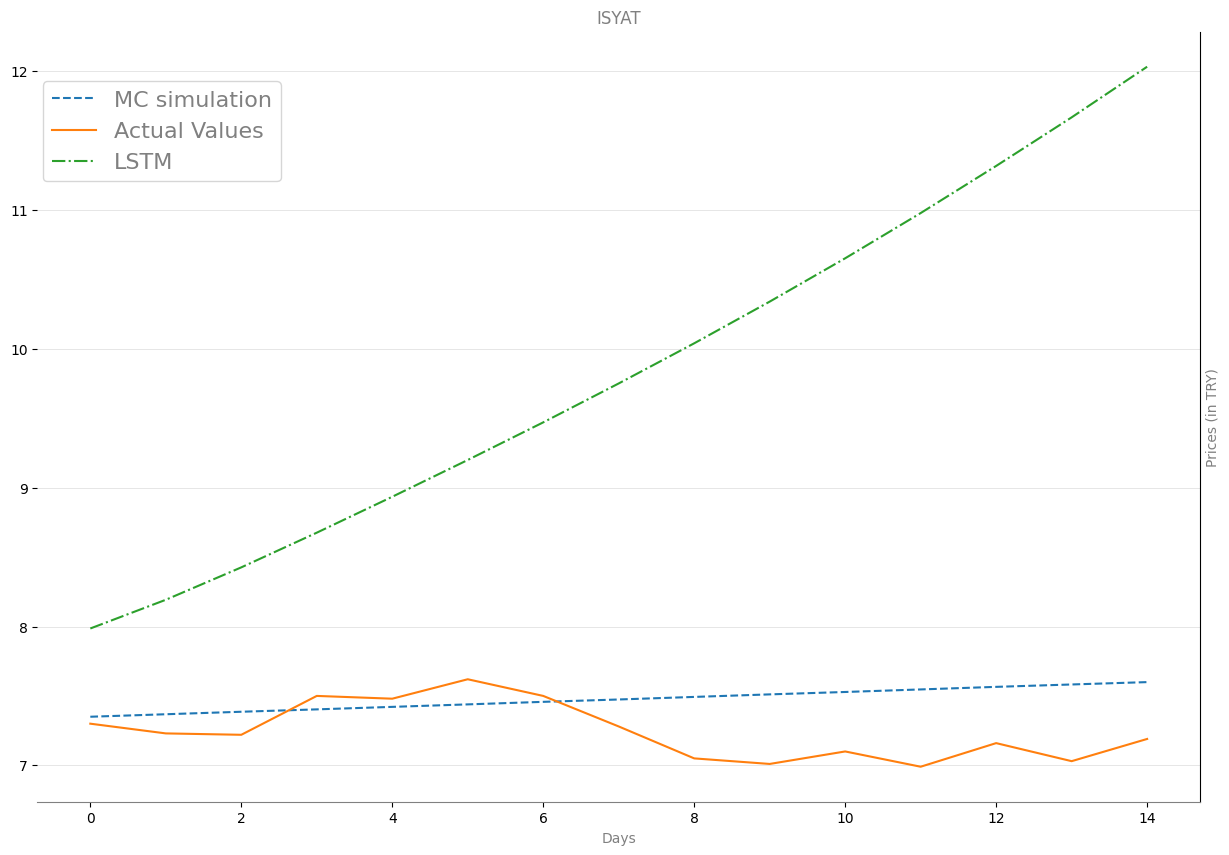

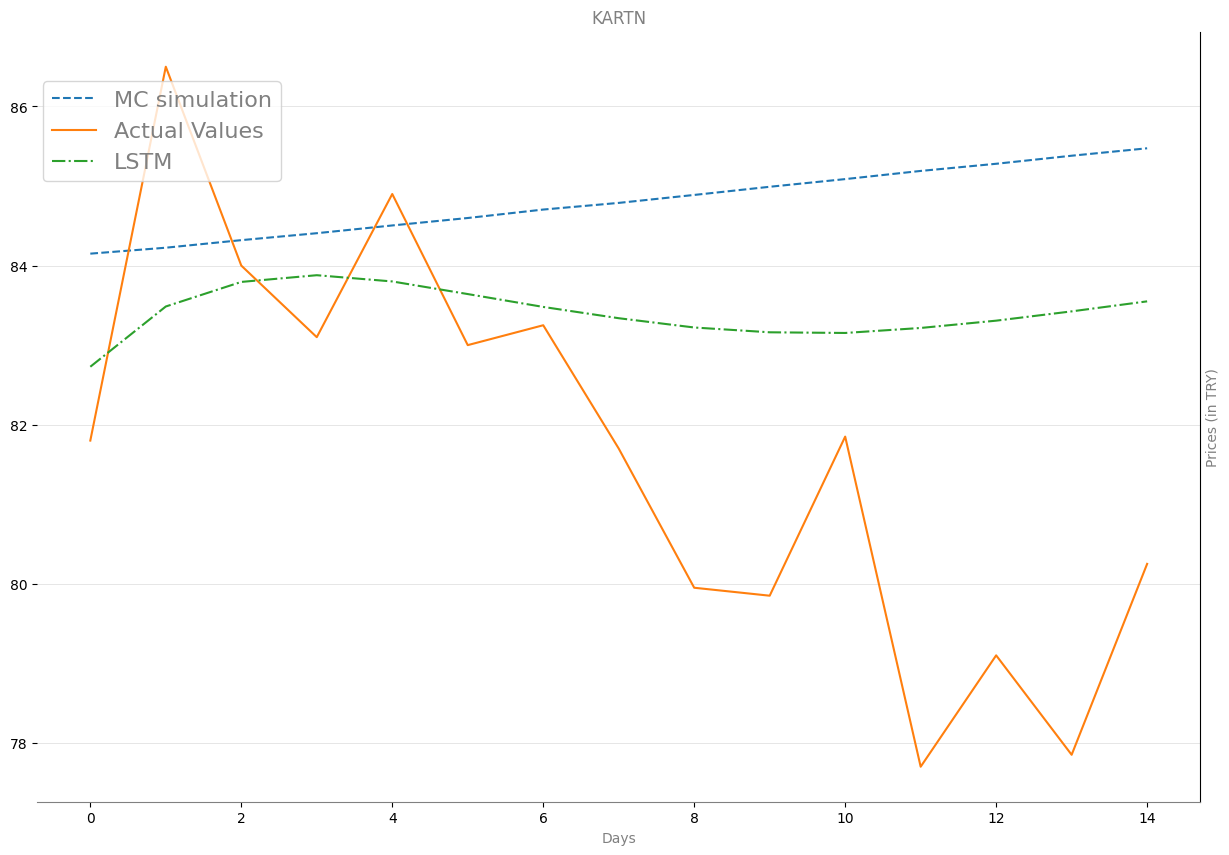

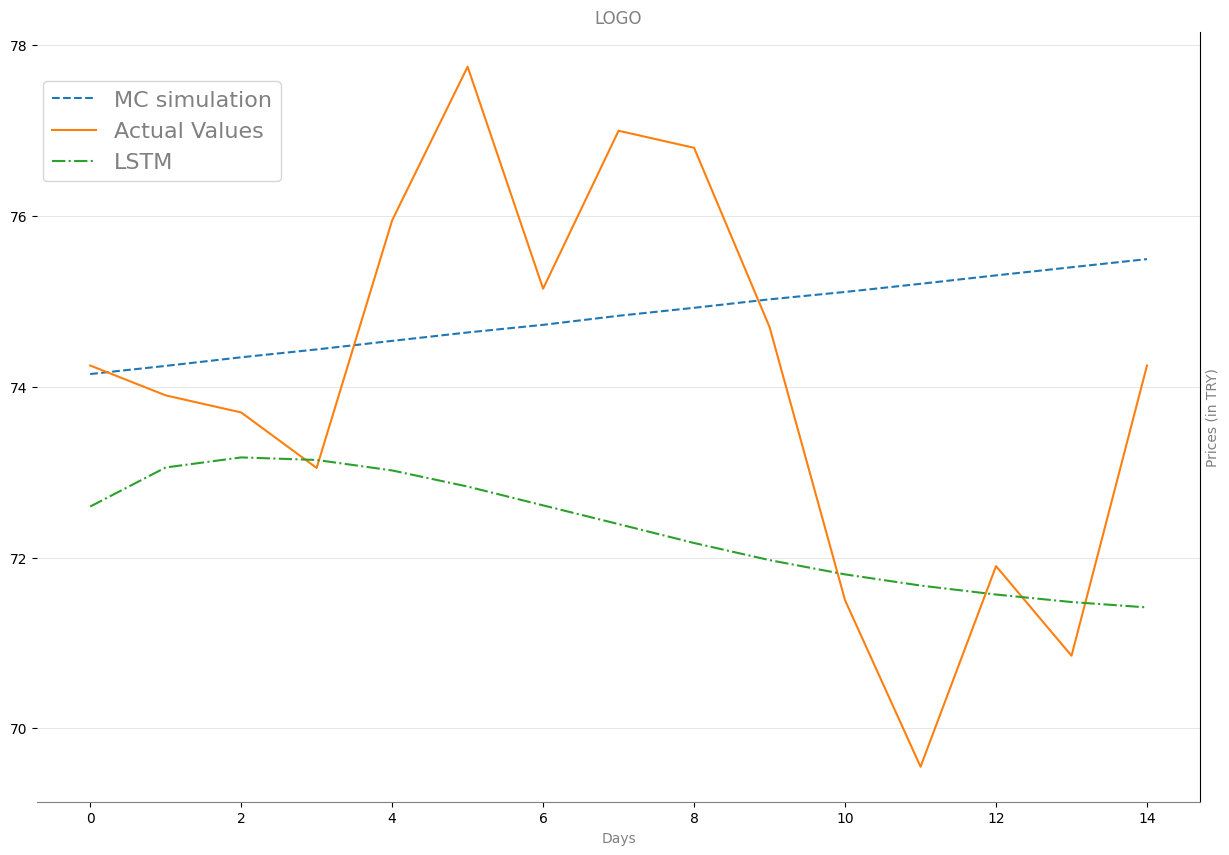

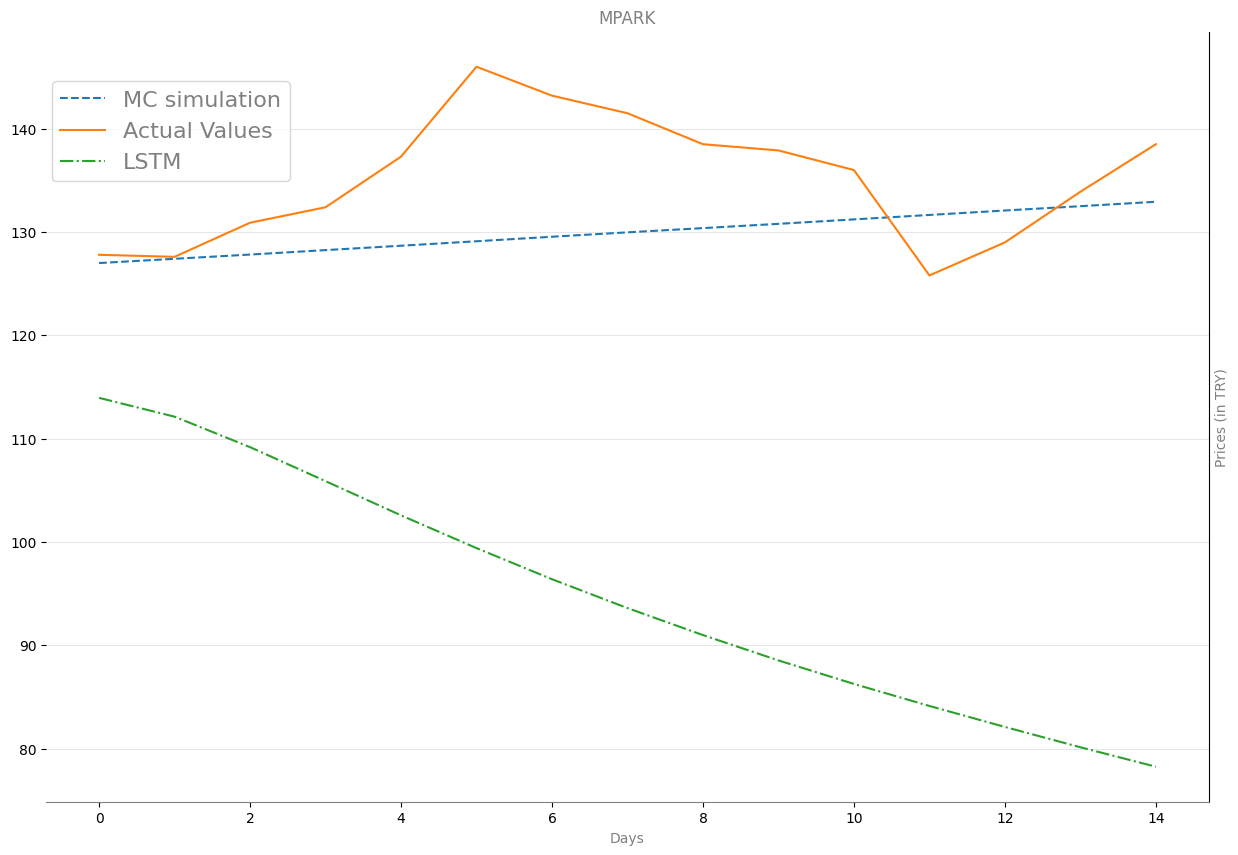

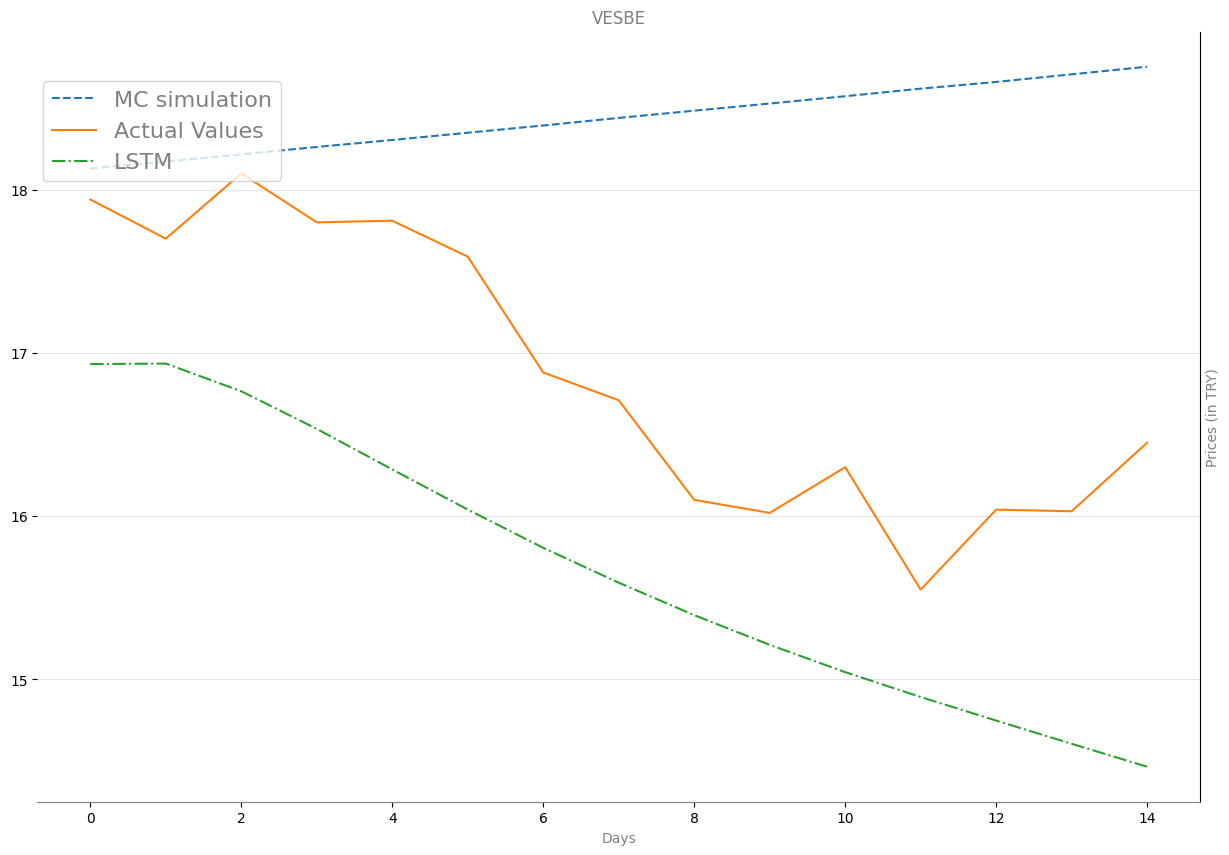

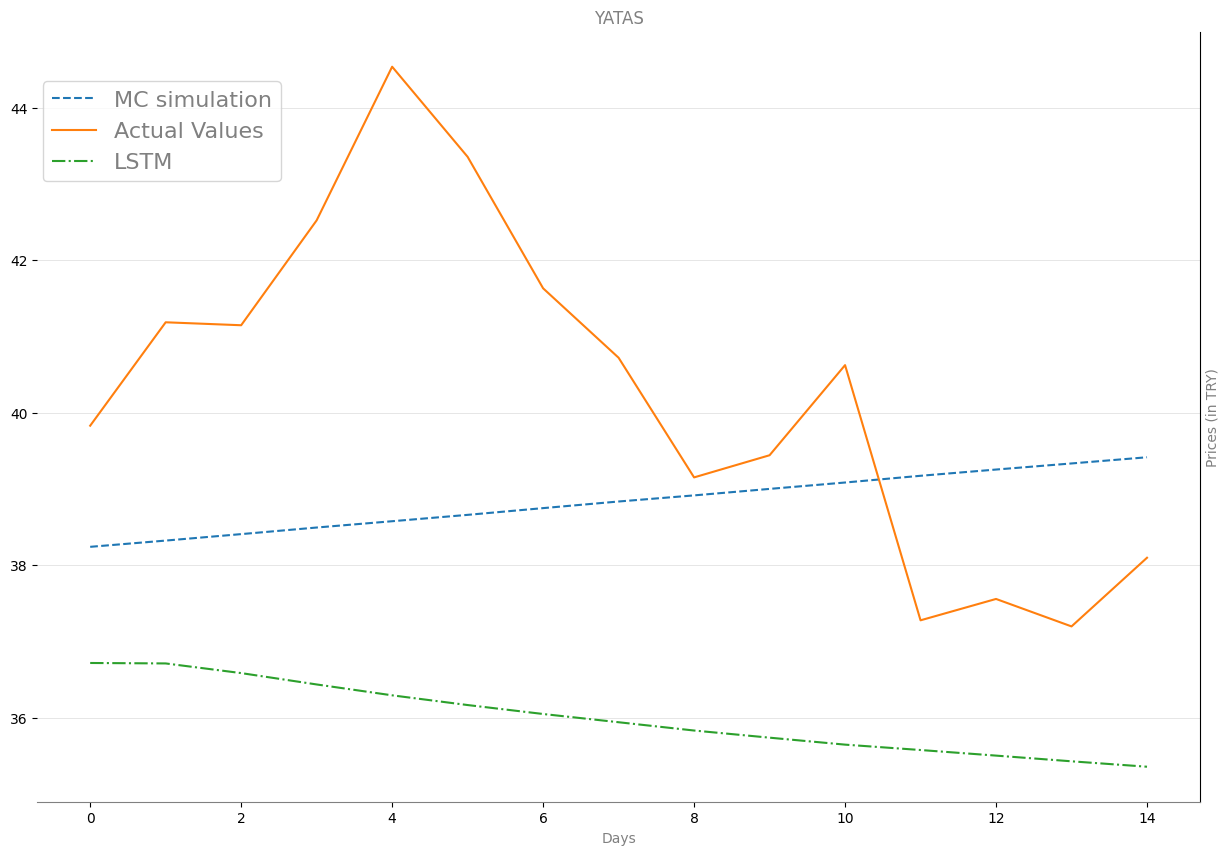

In [133]:
result = {}
val_date = time_it('2023-09-22 00:00:00')
for symbol in chosen_stocks.index:
    val_data =  stocks_info[symbol]['Stock Data'].loc[(stocks_info[symbol]['Stock Data'].index >= end) 
                                       & (stocks_info[symbol]['Stock Data'].index < val_date )]
    mc_data = predicted[symbol]['MC'].mean(axis=1)
    lstm_data = []
    actual_data = val_data['Adj Close'].values
    for i in range(days):
        lstm_data.append(predicted[symbol]['LSTM'][i][0][0])
    fig, ax = plt.subplots()
    ax.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
    ax.set_title(str(symbol), color = 'gray')
    ax.plot(mc_data, label='MC simulation', ls='--')
    ax.plot(actual_data, label='Actual Values')
    ax.plot(lstm_data, label='LSTM', ls='-.')
    ax.set_ylabel('Prices (in TRY)')
    ax.yaxis.label.set_color(color = 'grey')
    ax.yaxis.set_label_position('right')
    ax.set_xlabel('Days')
    ax.xaxis.label.set_color(color = 'grey')
    format_borders(ax)
    format_legend(ax)
    result[symbol] = {'Name': stocks_info[symbol]['Name'],
                      'Sector': stocks_info[symbol]['Sector'],
                      'Beta': stocks_info[symbol]['Beta'],
                      'VAR': stocks_info[symbol]['VAR'],
                      'LSTM expected': lstm_data[-1],
                      'Monte Carlo expected': mc_data.iloc[-1],
                      'Actual price': actual_data[-1],
                      'Simulation days': days}
    

In [156]:
result_df = pd.concat([pd.DataFrame(result.keys()),
                      pd.DataFrame(result.values())],
                      axis=1)
result_df.rename(columns = {0:'Symbol'}, inplace = True)
result_df

,Symbol,Name,Sector,Beta,VAR,LSTM expected,Monte Carlo expected,Actual price,Simulation days
0,AEFES,Anadolu Efes,Meşrubat / İçecek,0.424437,0.049925,117.125008,111.859050,107.800003,15
1,ALKIM,Alkim,Kimyasal Ürün,0.444123,0.048930,33.041916,39.020180,42.580002,15
2,BIMAS,Bim Birleşik Mağazalar A.Ş,Perakande - Ticaret,0.538750,0.045940,444.869934,261.820228,275.700012,15
3,BRISA,Brisa,Otomotiv Lastiği,0.468236,0.049805,54.606438,75.732077,85.449997,15
4,CCOLA,Coca-Cola İçecek A.Ş,Meşrubat / İçecek,0.467700,0.046164,250.368683,410.744191,378.000000,15
5,HDFGS,Hedef Girişim Sermayesi,Yatırım Ortaklıkları,0.411395,0.047467,2.490739,2.091290,2.050000,15
6,ISYAT,İs YO,Yatırım Ortaklıkları,0.457803,0.045124,12.032105,7.599454,7.190000,15
7,KARTN,Kartonsan,Kağıt Ürünleri,0.436242,0.048281,83.550369,85.474569,80.250000,15
8,LOGO,Logo Yazılım,Teknoloji,0.424997,0.046008,71.416016,75.496329,74.250000,15
9,MPARK,MLP Sağlık Hizmetleri,Sağlık ve İlaç,0.426093,0.046866,78.254433,132.931405,138.500000,15
